# !python -m pip --version

# import numpy as np
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# #import plotly.express as px
# import sklearn
# import category_encoders
# import imblearn
# import scipy
# import joblib

# # Print versions
# print("Library Versions:")
# print(f"numpy: {np.__version__}")
# print(f"pandas: {pd.__version__}")
# print(f"seaborn: {sns.__version__}")
# print(f"matplotlib: {plt.matplotlib.__version__}")
# #print(f"plotly: {plotly.__version__}")  # Import plotly directly for version info
# print(f"scikit-learn: {sklearn.__version__}")
# print(f"category_encoders: {category_encoders.__version__}")
# print(f"imblearn: {imblearn.__version__}")
# print(f"scipy: {scipy.__version__}")
# print(f"joblib: {joblib.__version__}")

In [1]:
# Manipulate
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Pre-Processing
from sklearn.model_selection import train_test_split # train-test-split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer # detect & handle NaNs
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder # Ordinal Encoding, Nominal Encoding
from category_encoders import BinaryEncoder # Nominal Encoding
from imblearn.under_sampling import RandomUnderSampler # undersampling
from imblearn.over_sampling import RandomOverSampler, SMOTE # oversampling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # Scaling


In [2]:
# Modeling

## 1) Pipeline
from sklearn.pipeline import Pipeline, make_pipeline # to make pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector # apply pipeline to each column


## 2') Classfication Models
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB, BernoulliNB, CategoricalNB, MultinomialNB
from sklearn.svm import LinearSVC, SVC, LinearSVR, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier, ExtraTreesRegressor # Bagging & Pasting
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor, HistGradientBoostingClassifier, HistGradientBoostingRegressor # Boosting
from sklearn.ensemble import VotingClassifier, VotingRegressor # Ensemble (Voting)
from sklearn.ensemble import StackingClassifier, StackingRegressor # Stacking
## 3) Model Selection (Underfitting vs Overfitting) [bias variance tradeoff => perfect model complexity]
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold, GridSearchCV, RandomizedSearchCV # (Train - Valid - Test) + hyperparameters tunning
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV, HalvingRandomSearchCV # if data / features is large
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error # Evaluate Model: r2=> accuracy, L2-norm: if no outliers, L1-norm: if outliers
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score
from scipy import stats # Confidence Interval of Accuracy / Loss / Utility
import joblib # save model

1) Understanding Data
a) Understand Columns
b) check dtype -> df[col].astype()
c) Describe Numerical Cols
d) Describe Categorical Cols

In [3]:
# a) Understand Columns
df = pd.read_csv("bank.csv",sep = ";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.head(5).to_csv("first_5_rows.csv", index=False)

1 - age (numeric)

2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

5 - default: has credit in default? (categorical: "no","yes","unknown")

6 - housing: has housing loan? (categorical: "no","yes","unknown")

7 - loan: has personal loan? (categorical: "no","yes","unknown")

related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: "cellular","telephone")

9 - month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")

10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

other attributes:
*12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

*13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

*14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

social and economic context attributes
*16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

*17 - cons.price.idx: consumer price index - monthly indicator (numeric)

*18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

*19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [5]:
df.duplicated().sum()

12

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().sum()

0

In [8]:
# b) check dtype -> df[col].astype()

df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

In [9]:
df['y'].value_counts()

y
no     36537
yes     4639
Name: count, dtype: int64

df.drop(['emp.var.rate', 'cons.price.idx','cons.conf.idx', 'euribor3m', 'nr.employed',], axis=1, inplace=True)
df

In [10]:
def map_values(value):
    if value == 'yes'or value == 'success':
        return 1.0
    elif value == 'no' or value == 'failure':
        return 0.0
    elif value == 'nonexistent':
        return np.nan
    return value  # Keeps other values unchanged

# Apply mapping only to specific columns
df[['y','poutcome']] = df[['y','poutcome']].applymap(map_values)
df

/tmp/ipykernel_124/2674113971.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[['y','poutcome']] = df[['y','poutcome']].applymap(map_values)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,0.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,0.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,0.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,0.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,NaN,-1.1,94.767,-50.8,1.028,4963.6,1.0
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,NaN,-1.1,94.767,-50.8,1.028,4963.6,0.0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,NaN,-1.1,94.767,-50.8,1.028,4963.6,0.0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,NaN,-1.1,94.767,-50.8,1.028,4963.6,1.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        5625 non-null   float64
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

In [12]:
# c) Describe Numerical Cols
df.select_dtypes(include='number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,41176.0,40.023800,10.420680,17.000,32.000,38.000,47.000,98.000
duration,41176.0,258.315815,259.305321,0.000,102.000,180.000,319.000,4918.000
campaign,41176.0,2.567879,2.770318,1.000,1.000,2.000,3.000,56.000
pdays,41176.0,962.464810,186.937102,0.000,999.000,999.000,999.000,999.000
previous,41176.0,0.173013,0.494964,0.000,0.000,0.000,0.000,7.000
poutcome,5625.0,0.244089,0.429584,0.000,0.000,0.000,0.000,1.000
emp.var.rate,41176.0,0.081922,1.570883,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41176.0,93.575720,0.578839,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41176.0,-40.502863,4.627860,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41176.0,3.621293,1.734437,0.634,1.344,4.857,4.961,5.045


In [13]:
#  duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
#pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
#poutcome: outcome of the previous marketing campaign (categorical: "failure":0,"nonexistent":nan,"success": 1)

In [14]:
# df['duration'] = df['duration'] / 3600


In [15]:
df[df['age'] == 98]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
38452,98,retired,married,basic.4y,unknown,yes,no,cellular,oct,fri,...,1,2,2,1.0,-3.4,92.431,-26.9,0.73,5017.5,1.0
38455,98,retired,married,basic.4y,unknown,yes,no,cellular,oct,fri,...,2,999,0,NaN,-3.4,92.431,-26.9,0.73,5017.5,1.0


In [16]:
df[df['pdays'] == 999]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,0.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,0.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,0.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,0.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,NaN,-1.1,94.767,-50.8,1.028,4963.6,1.0
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,NaN,-1.1,94.767,-50.8,1.028,4963.6,0.0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,NaN,-1.1,94.767,-50.8,1.028,4963.6,0.0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,NaN,-1.1,94.767,-50.8,1.028,4963.6,1.0


In [17]:
# c) Describe Numerical Cols
df.select_dtypes(include='number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,41176.0,40.023800,10.420680,17.000,32.000,38.000,47.000,98.000
duration,41176.0,258.315815,259.305321,0.000,102.000,180.000,319.000,4918.000
campaign,41176.0,2.567879,2.770318,1.000,1.000,2.000,3.000,56.000
pdays,41176.0,962.464810,186.937102,0.000,999.000,999.000,999.000,999.000
previous,41176.0,0.173013,0.494964,0.000,0.000,0.000,0.000,7.000
poutcome,5625.0,0.244089,0.429584,0.000,0.000,0.000,0.000,1.000
emp.var.rate,41176.0,0.081922,1.570883,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41176.0,93.575720,0.578839,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41176.0,-40.502863,4.627860,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41176.0,3.621293,1.734437,0.634,1.344,4.857,4.961,5.045


In [18]:
# d) Describe Categorical Cols

cat_cols = df.select_dtypes(include="O").columns

for col in cat_cols:
    print(f"number of uniques of \'{col}\' is: {df[col].nunique()}")
    print(f"uniques of \'{col}\' is:\n{df[col].unique()}")
    print()
    print('*' * 50)
    print()

number of uniques of 'job' is: 12
uniques of 'job' is:
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

**************************************************

number of uniques of 'marital' is: 4
uniques of 'marital' is:
['married' 'single' 'divorced' 'unknown']

**************************************************

number of uniques of 'education' is: 8
uniques of 'education' is:
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

**************************************************

number of uniques of 'default' is: 3
uniques of 'default' is:
['no' 'unknown' 'yes']

**************************************************

number of uniques of 'housing' is: 3
uniques of 'housing' is:
['no' 'yes' 'unknown']

**************************************************

number of uniques of 'loan' is: 3
uniques of 'loan' is:
['no' 'yes' 'unknow

In [19]:
for col in cat_cols:
    print(f"count of each unique in column \'{col}\' is:\n{df[col].value_counts()}")
    print()
    print('*' * 50)
    print()

count of each unique in column 'job' is:
job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

**************************************************

count of each unique in column 'marital' is:
marital
married     24921
single      11564
divorced     4611
unknown        80
Name: count, dtype: int64

**************************************************

count of each unique in column 'education' is:
education
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: count, dtype: int64

**************************************************

count of each unique in colu

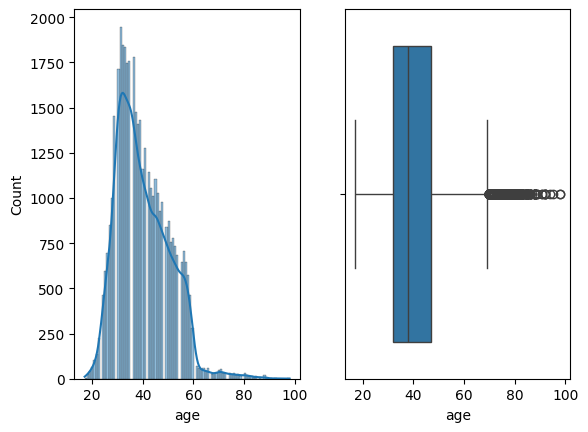

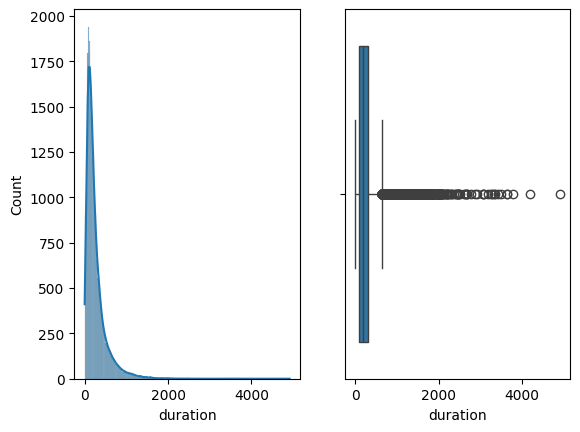

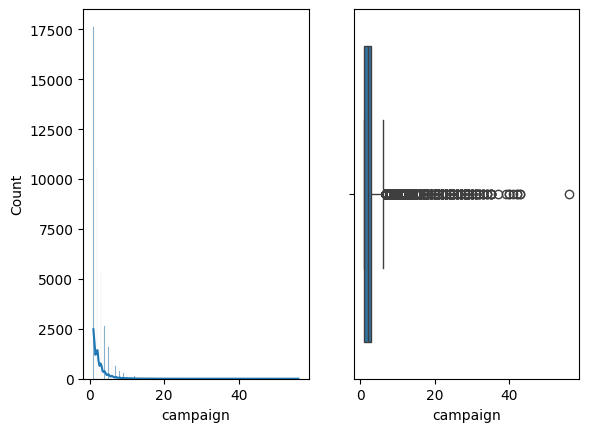

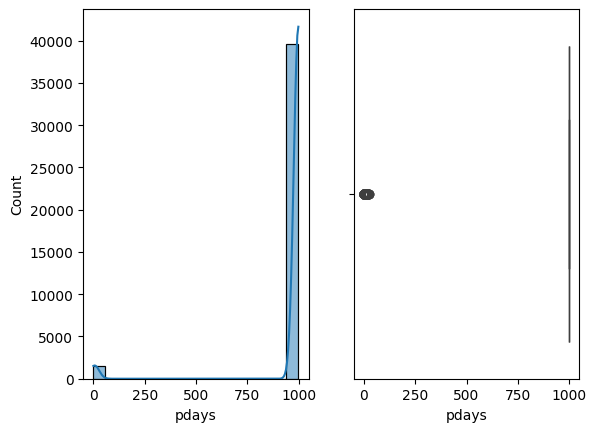

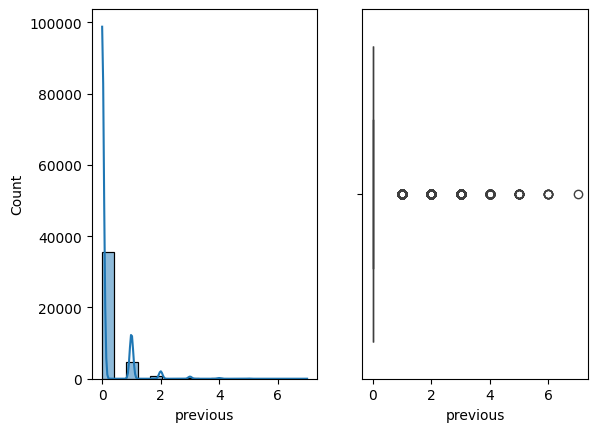

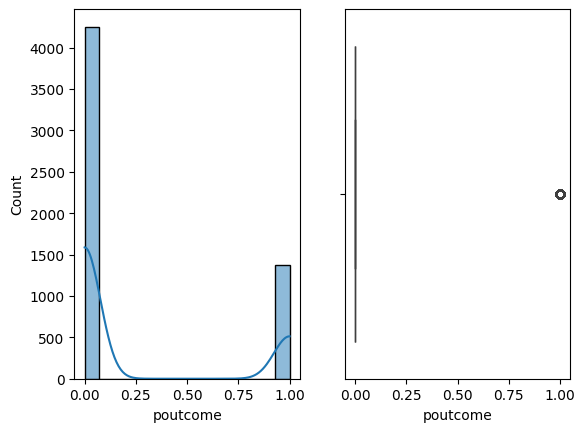

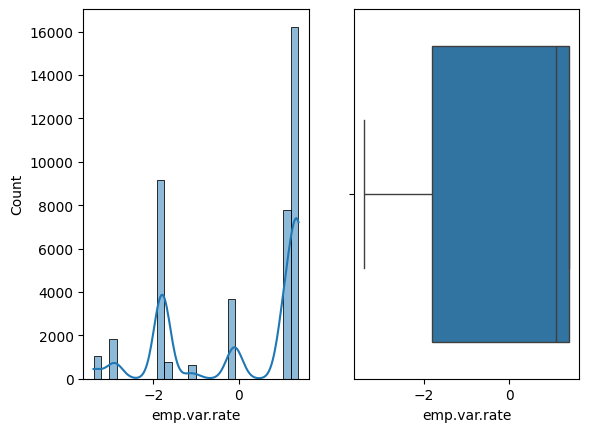

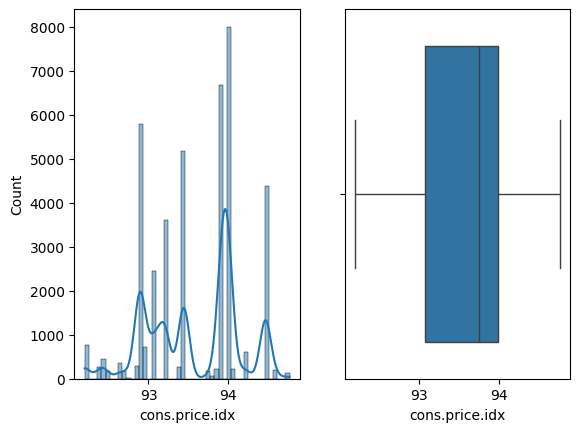

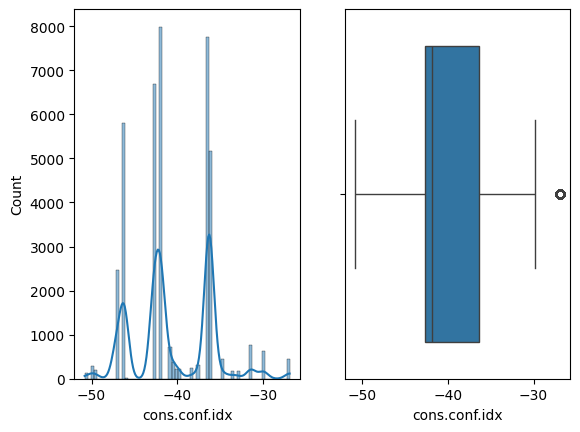

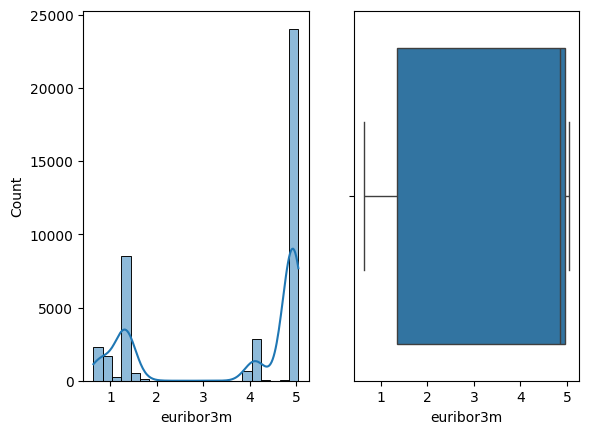

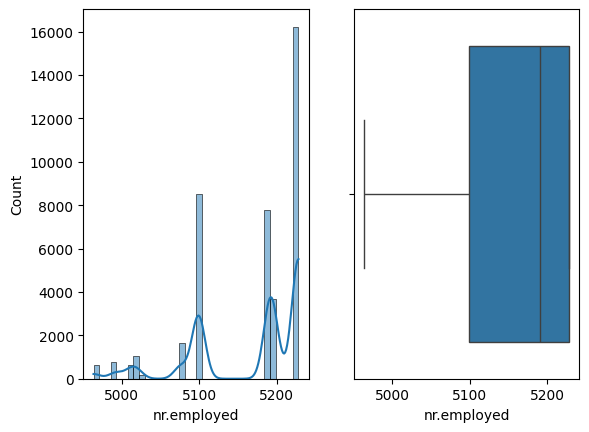

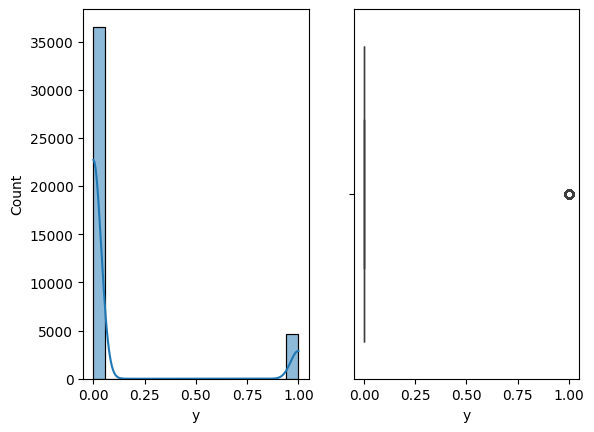

In [20]:
# UniVariate Analysis

num_cols = df.select_dtypes(include="number").columns

for col in num_cols:
    fig, axes= plt.subplots(nrows=1, ncols=2)
    sns.histplot(df[col], kde=True, ax=axes[0])
    sns.boxplot(x=df[col], ax=axes[1])
    plt.show()
    # right 'age','duration','campaign','pdays','previous','poutcome', 'pdays' has -1 values will has its own pipeline
   


/tmp/ipykernel_124/4053274779.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sx.set_xticklabels(sx.get_xticklabels(), rotation=45)
/tmp/ipykernel_124/4053274779.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sx.set_xticklabels(sx.get_xticklabels(), rotation=45)


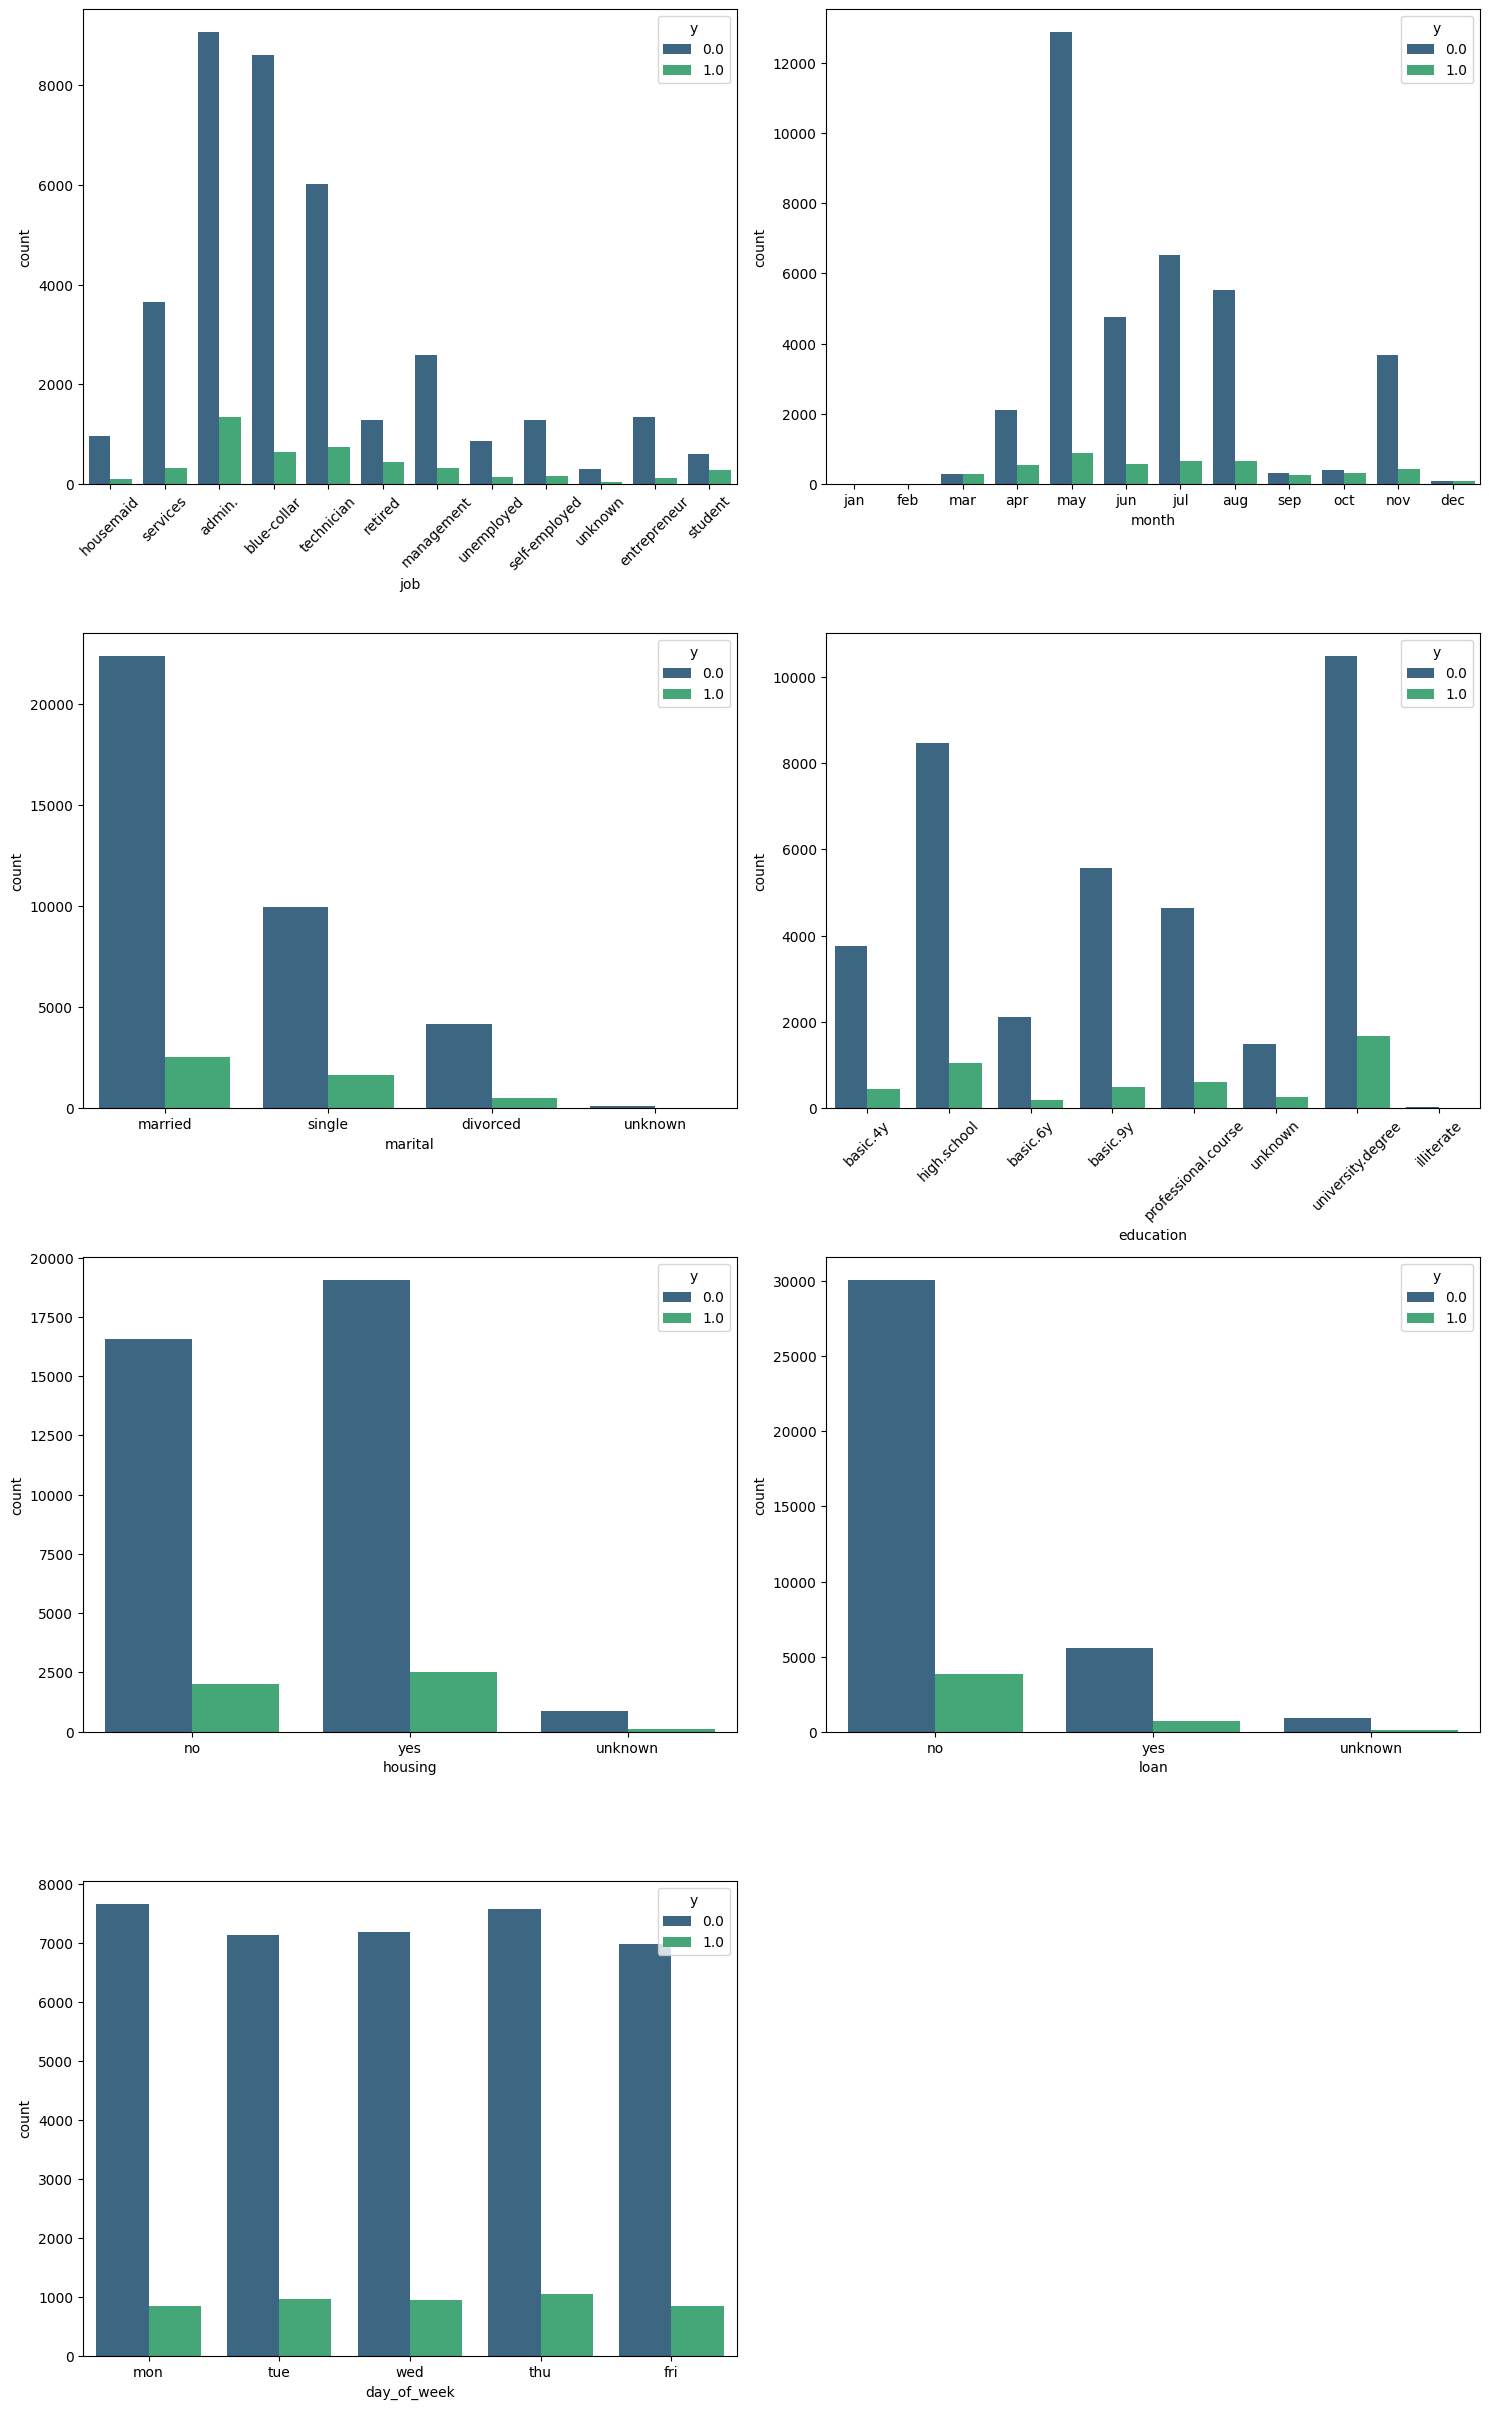

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
 #Yes and No vs (Job, Month, Marital status, Education, Day of week, Housing, Contact, default)


# Convert 'month' to categorical without making a copy
df['month'] = df['month'].astype("category")
df['month'] = df['month'].cat.set_categories(
    ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], 
    ordered=True
)

# Plot
plt.figure(figsize=(15, 30))

# Job
sx = plt.subplot(5, 2, 1)
sns.countplot(x="job", hue="y", data=df, palette='viridis')
sx.set_xticklabels(sx.get_xticklabels(), rotation=45)

# Month
sx = plt.subplot(5, 2, 2)
sns.countplot(x="month", hue="y", data=df.sort_values("month"), palette='viridis')

# Marital
sx = plt.subplot(5, 2, 3)
sns.countplot(x="marital", hue="y", data=df, palette='viridis')

# Education
sx = plt.subplot(5, 2, 4)
sns.countplot(x="education", hue="y", data=df, palette='viridis')
sx.set_xticklabels(sx.get_xticklabels(), rotation=45)

# Housing
sx = plt.subplot(5, 2, 5)
sns.countplot(x="housing", hue="y", data=df, palette='viridis')

# Loan
sx = plt.subplot(5, 2, 6)
sns.countplot(x="loan", hue="y", data=df, palette='viridis')

# Day of Week
sx = plt.subplot(5, 2, 7)
sns.countplot(x="day_of_week", hue="y", data=df, palette='viridis')

plt.tight_layout()
plt.show()


In [22]:
# Retired people and people with blue-collar, technitian and admin jobs contribute to the majority of the deposits.
# April to August including November contributes to highest deposits.
# poeple without loans at the bank tend to have contributed more to the deposits.
# cellular contacts and people with no defaults are more favorable.

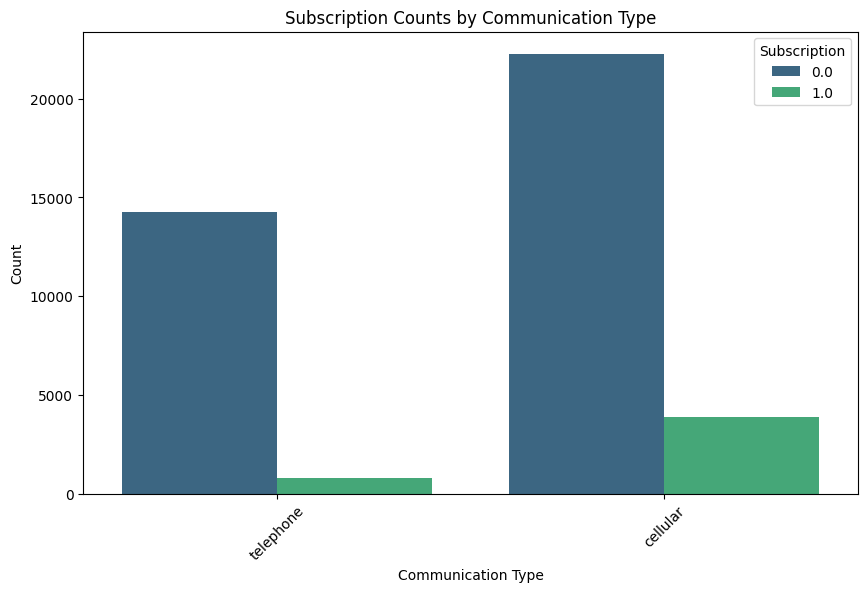

In [23]:
# Which communication way (cellular, telephone) have the highest subscription rates for term deposits?

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='contact', hue='y',palette='viridis')
plt.xlabel('Communication Type')
plt.ylabel('Count')
plt.title('Subscription Counts by Communication Type')
plt.xticks(rotation=45)
plt.legend(title='Subscription')
plt.show()

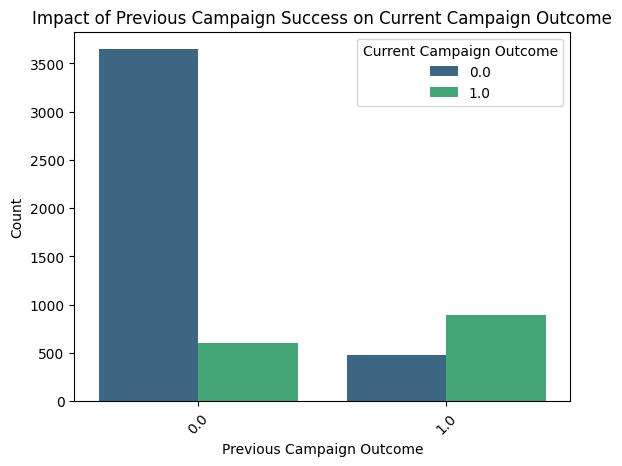

In [24]:
## Does past campaign success affect the current campaign?
sns.countplot(data=df, x='poutcome', hue='y', palette='viridis')
plt.xlabel('Previous Campaign Outcome')
plt.ylabel('Count')
plt.title('Impact of Previous Campaign Success on Current Campaign Outcome')
plt.xticks(rotation=45)
plt.legend(title='Current Campaign Outcome')
plt.show()

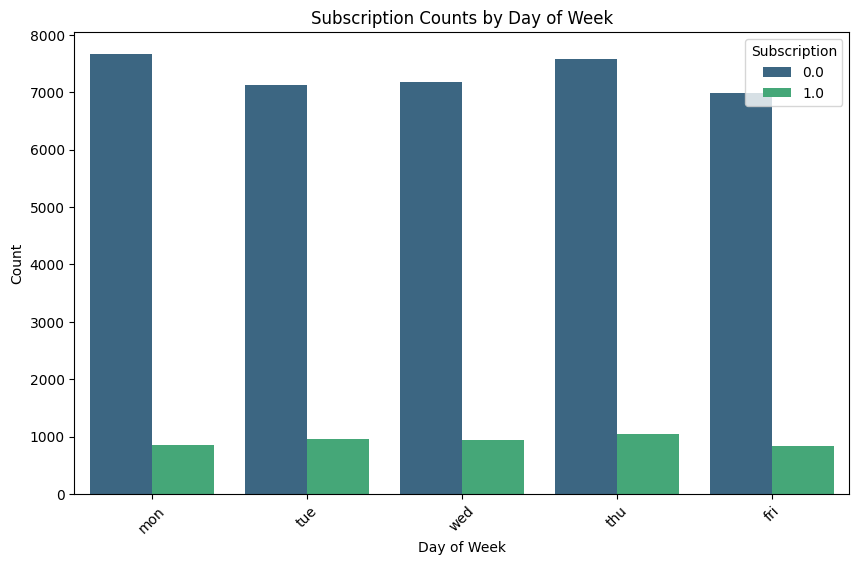

In [25]:
##How does the day of the week impact marketing campaign success?

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='day_of_week', hue='y',palette='viridis')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.title('Subscription Counts by Day of Week')
plt.xticks(rotation=45)
plt.legend(title='Subscription')
plt.show()

In [26]:
# the best day to make a call is likely to be Thursday

In [27]:
# # Bi-Variate
# plt.figure(figsize=(8, 8))
# sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
# plt.show()

In [28]:
# extrating contacted_before from pdays 
def is_contacted_before(x):
    if x == 999:
        return 0.0
    else:
        return 1.0
df[['is_contacted_before']] = df[['pdays']].applymap(is_contacted_before)
df

/tmp/ipykernel_124/2561679773.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[['is_contacted_before']] = df[['pdays']].applymap(is_contacted_before)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,is_contacted_before
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,0.0,0.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,0.0,0.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,0.0,0.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,0.0,0.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,999,0,NaN,-1.1,94.767,-50.8,1.028,4963.6,1.0,0.0
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,NaN,-1.1,94.767,-50.8,1.028,4963.6,0.0,0.0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,999,0,NaN,-1.1,94.767,-50.8,1.028,4963.6,0.0,0.0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,NaN,-1.1,94.767,-50.8,1.028,4963.6,1.0,0.0


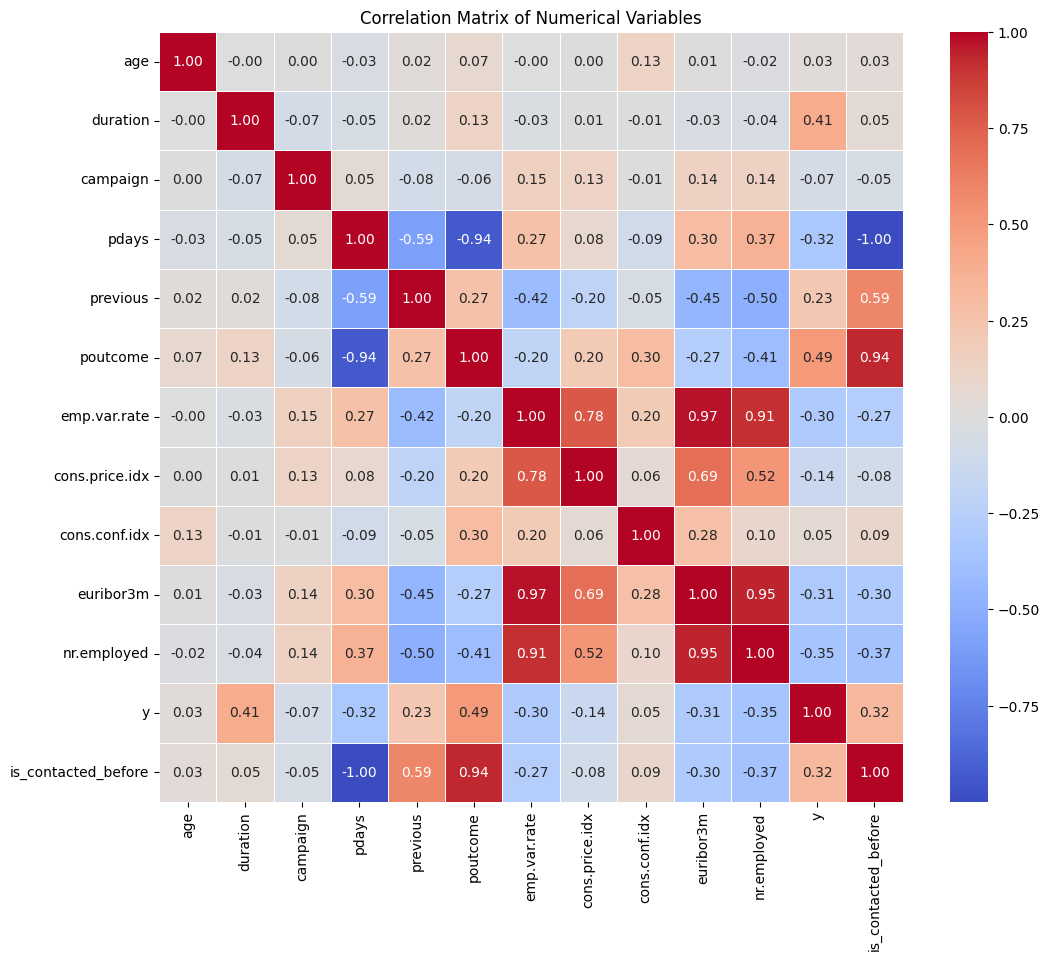

In [29]:
# Bi-Variate analysis - only for numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

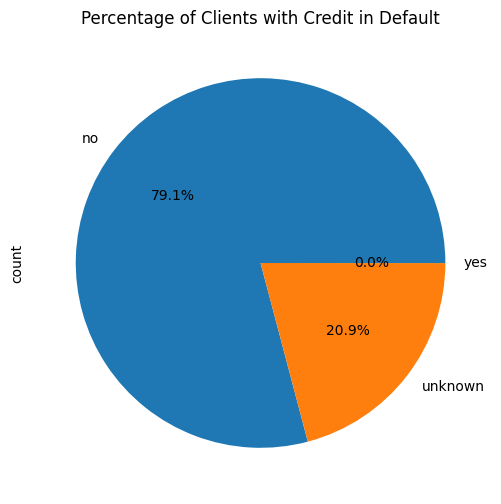

In [30]:
## What percentage of clients have credit in default
plt.figure(figsize=(6, 6))
df['default'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Percentage of Clients with Credit in Default')
plt.show()

In [31]:
df['default'].value_counts()

default
no         32577
unknown     8596
yes            3
Name: count, dtype: int64

In [32]:
# only 3 clients have credit that's why it's cosidered 0% in the pie chart .. too little.

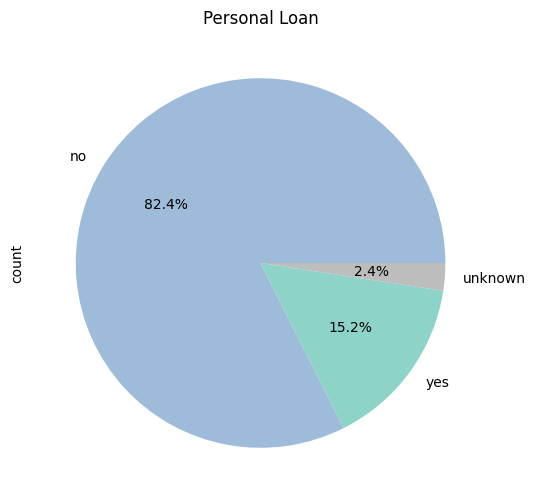

In [33]:
#How many clients have personal loans and how many don't?
plt.figure(figsize=(6, 6))
df['loan'].value_counts().plot.pie(autopct='%1.1f%%',colors=['#9ebcda','#8dd3c7','#bdbdbd'])
plt.title('Personal Loan')
plt.show()

In [34]:
# check nan values in percentage
print(df.isna().sum() / len(df) * 100)

age                     0.00000
job                     0.00000
marital                 0.00000
education               0.00000
default                 0.00000
housing                 0.00000
loan                    0.00000
contact                 0.00000
month                   0.00000
day_of_week             0.00000
duration                0.00000
campaign                0.00000
pdays                   0.00000
previous                0.00000
poutcome               86.33913
emp.var.rate            0.00000
cons.price.idx          0.00000
cons.conf.idx           0.00000
euribor3m               0.00000
nr.employed             0.00000
y                       0.00000
is_contacted_before     0.00000
dtype: float64


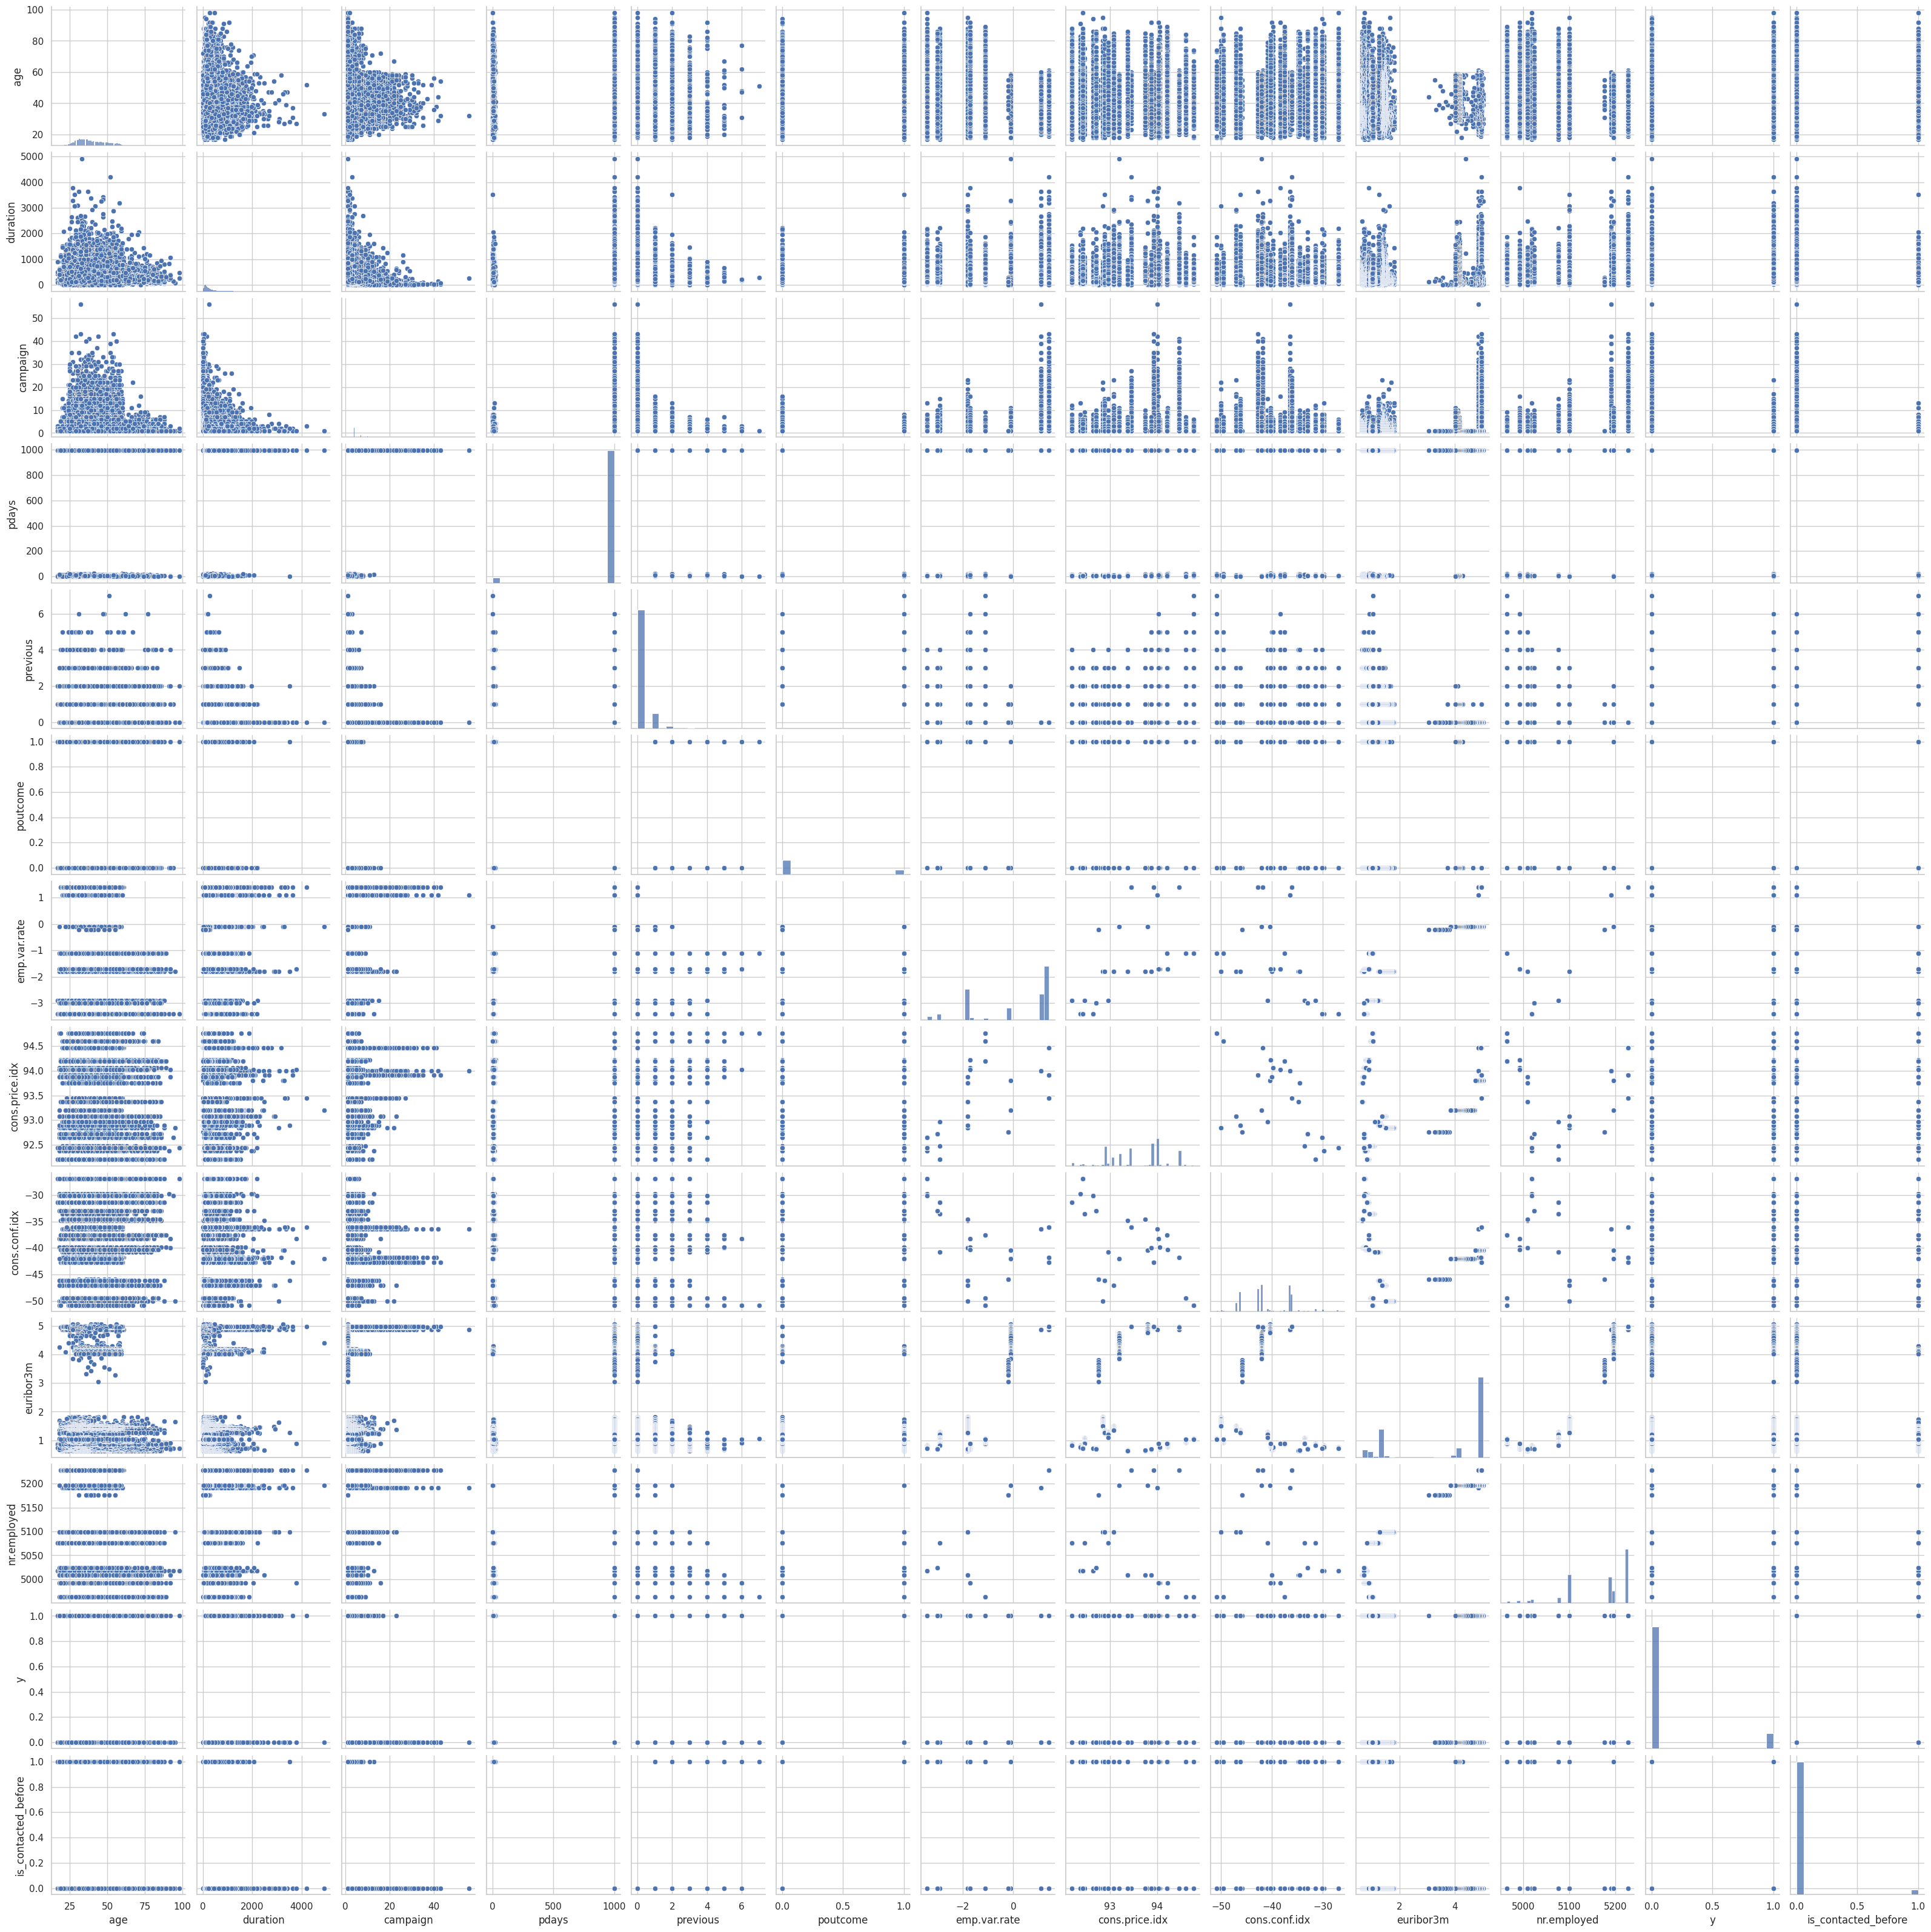

In [35]:
sns.set_theme(style='whitegrid')
sns.pairplot(df.select_dtypes(include='number'))

In [36]:
df = df.drop(columns =['day_of_week','month','age', 'job', 'marital', 'education', 'default', 'housing', 'loan','contact', 'campaign', 'pdays', 'emp.var.rate', 'cons.price.idx','cons.conf.idx', 'euribor3m', 'nr.employed'],axis = 1)
df

,duration,previous,poutcome,y,is_contacted_before
0,261,0,NaN,0.0,0.0
1,149,0,NaN,0.0,0.0
2,226,0,NaN,0.0,0.0
3,151,0,NaN,0.0,0.0
4,307,0,NaN,0.0,0.0
...,...,...,...,...,...
41183,334,0,NaN,1.0,0.0
41184,383,0,NaN,0.0,0.0
41185,189,0,NaN,0.0,0.0
41186,442,0,NaN,1.0,0.0


In [37]:
df['poutcome'].value_counts(normalize=True)

poutcome
0.0    0.755911
1.0    0.244089
Name: proportion, dtype: float64

In [38]:
df['poutcome'].fillna(0, inplace=True)

In [39]:
df['poutcome'].value_counts(normalize=True)

poutcome
0.0    0.966655
1.0    0.033345
Name: proportion, dtype: float64

# ### 3) Pre-Processing Mind Map:

In [40]:
# a) Detect & Handle Duplicates
# * b) train_test_split
# * c) Detect & Handle NaNs

# * d) Detect & Handle Outliers

# * e) Encoding: (Ordinal:[OrdinalEncoder, LabelEncoder] - Nominal: [< 7 uniques(OneHotEncoding), > 7 uniques (BinaryEncoder)])

# * f) Imbalanced: X_train_resampled

# * g) Scaling: StandardScaler, MinMaxScaler, RobustScaler: X_train_resampled_scaled

In [41]:
# a) Detect & Handle Duplicates
df.duplicated().sum()

36249

In [42]:
# df.drop_duplicates(inplace=True)
# df.reset_index(inplace=True, drop=True)
# df

In [43]:
df['y'].value_counts(normalize=True)

y
0.0    0.887337
1.0    0.112663
Name: proportion, dtype: float64

In [44]:
# b) train_test_split

X = df.drop(["y"], axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)
X_train

,duration,previous,poutcome,is_contacted_before
36454,122,1,0.0,0.0
1233,1119,0,0.0,0.0
24111,168,0,0.0,0.0
15516,129,0,0.0,0.0
17916,197,0,0.0,0.0
...,...,...,...,...
33267,43,0,0.0,0.0
22714,873,0,0.0,0.0
6971,619,0,0.0,0.0
18503,61,0,0.0,0.0


In [45]:
X_test.shape

(8236, 4)

In [46]:
X_train.isna().sum()

duration               0
previous               0
poutcome               0
is_contacted_before    0
dtype: int64

In [47]:
# numerical columns
numerical_columns=X_train.select_dtypes(include='number').columns
numerical_columns

Index(['duration', 'previous', 'poutcome', 'is_contacted_before'], dtype='object')

In [48]:
# # categorical columns and numerical columns
# categorical_columns=X_train.select_dtypes(include='object').columns
# categorical_columns

In [49]:
from sklearn.base import TransformerMixin, BaseEstimator


class LogTransformer(BaseEstimator, TransformerMixin):

    # fit
    def fit(self, X, y=None):
        # self.feature_names = list(X.columns)
        self.n_features_in = X.shape[1]
        return self

    # transformer
    def transform(self, X, y=None):
        assert self.n_features_in == X.shape[1]
        return np.log(X)

    # def get_feature_names_out(self, X, y=None):
    #     return self.feature_names



log_transformer = LogTransformer()
log_transformer

LogTransformer()

In [50]:
num_pipeline = Pipeline(steps=[
    ('RobustScaler', RobustScaler())
])

# categorical pipeline
# cat_pipeline = Pipeline(steps=[
#     ('OneHotEncoder', OneHotEncoder(drop='first',sparse_output=False))
# ])

# column transformer
preprocessor = ColumnTransformer([
    ('num_pipeline', num_pipeline, numerical_columns),
    #('cat_pipeline', cat_pipeline, categorical_columns)
])

In [51]:
X_trian_scaled = preprocessor.fit_transform(X_train)
X_trian_scaled

array([[-0.26267281,  1.        ,  0.        ,  0.        ],
       [ 4.33179724,  0.        ,  0.        ,  0.        ],
       [-0.05069124,  0.        ,  0.        ,  0.        ],
       ...,
       [ 2.02764977,  0.        ,  0.        ,  0.        ],
       [-0.5437788 ,  0.        ,  0.        ,  0.        ],
       [-0.38709677,  0.        ,  0.        ,  0.        ]])

In [52]:
X_test_scaled = preprocessor.transform(X_test)
X_test_scaled

array([[-0.02764977,  0.        ,  0.        ,  0.        ],
       [ 0.47465438,  1.        ,  1.        ,  1.        ],
       [ 0.00460829,  1.        ,  0.        ,  0.        ],
       ...,
       [ 1.53917051,  1.        ,  0.        ,  0.        ],
       [-0.05990783,  0.        ,  0.        ,  0.        ],
       [-0.0875576 ,  0.        ,  0.        ,  0.        ]])

# # 4) Modeling

In [53]:
# * 1) Simple Model & Validate it's perfromance
# * 2) Underfitting vs Overfitting
# * 3) Hyperparameters Tunning (best 5 Promissing models)
# * 4) Ensemble (if needed)
# * 5) Test Performance and it's CI
# * 6) Save Model and load in streamlit application or flask application

## Simple Model & Validate it's perfromance

In [54]:
log_reg = LogisticRegression(random_state=42, C=1.0, max_iter=100, warm_start=True, class_weight='balanced')
log_reg.fit(X_trian_scaled, y_train)

LogisticRegression(class_weight='balanced', random_state=42, warm_start=True)

In [55]:
log_reg.score(X_trian_scaled, y_train)

0.8411353976927748

In [56]:
y_valid_pred = cross_val_predict(log_reg, X_trian_scaled ,y_train, cv=3)
confusion_matrix(y_true=y_train, y_pred=y_valid_pred)

array([[25080,  4149],
       [ 1087,  2624]])

In [57]:
print(f"Validation Precision Score: {precision_score(y_train, y_valid_pred)}")
print(f"Validation Recall Score: {recall_score(y_train, y_valid_pred)}")
print(f"Validation f1 Score: {f1_score(y_train, y_valid_pred)}")

Validation Precision Score: 0.38742064077956595
Validation Recall Score: 0.7070870385340878
Validation f1 Score: 0.5005723006486074


In [58]:
y_train_pred = log_reg.predict(X_trian_scaled)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Validation Accuracy: {accuracy_score(y_train, y_valid_pred)}")

Train Accuracy: 0.8411353976927748
Validation Accuracy: 0.8410443230115361


## Underfitting vs Overfitting

Underfitting 
Solutions :
* 1) More Complex Model

* 2) Extract More Features (PolynomialFeatures)

* 3) descrease constrains

In [59]:
from sklearn.preprocessing import PolynomialFeatures

num_pipeline = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=5, include_bias=False)),
    ('RobustScaler', RobustScaler())
])

# categorical pipeline
# cat_pipeline = Pipeline(steps=[
#     ('OneHotEncoder', OneHotEncoder(drop='first',sparse_output=False))
# ])

# column transformer
poly_preprocessor = ColumnTransformer([
    ('num_pipeline', num_pipeline, numerical_columns),
  #  ('cat_pipeline', cat_pipeline, categorical_columns)
])

X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.fit_transform(X_test)

In [60]:
log_reg = LogisticRegression(C=1,penalty='l2',random_state=1,max_iter=500,tol=0.000000001,class_weight='balanced')
log_reg.fit(X_train_scaled, y_train)
y_train_pred = log_reg.predict(X_train_scaled) # train
y_valid_pred = cross_val_predict(log_reg, X_train_scaled, y_train, cv=3) # valid
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Validation Accuracy: {accuracy_score(y_train, y_valid_pred)}")

Train Accuracy: 0.8411353976927748
Validation Accuracy: 0.8407710989678203


In [61]:
y_valid_pred = cross_val_predict(log_reg, X_trian_scaled ,y_train, cv=3)
confusion_matrix(y_true=y_train, y_pred=y_valid_pred)

array([[25070,  4159],
       [ 1086,  2625]])

In [62]:
linear_svc_clf = LinearSVC(C=1, random_state=42, max_iter=10000, class_weight='balanced', loss='hinge')
linear_svc_clf.fit(X_train_scaled, y_train)
y_train_pred = linear_svc_clf.predict(X_train_scaled) # train
y_valid_pred = cross_val_predict(linear_svc_clf, X_train_scaled, y_train, cv=3) # valid
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Validation Accuracy: {accuracy_score(y_train, y_valid_pred)}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_train, y_valid_pred))

Train Accuracy: 0.844474802671524
Validation Accuracy: 0.8443230115361263

Confusion Matrix:
[[25211  4018]
 [ 1110  2601]]


linear_svc_clf

In [63]:
### the dataset is nonlinear we should use non linear models

# lets solve imbalanced
* 1) undersampling
* 2) oversampling

2- Undersampling

In [64]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as Imb_Pipeline

undersampling_polyfeats_pipeline = Imb_Pipeline(steps=[
    ('poly_preprocessor', poly_preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
])

undersampling_polyfeats_pipeline

Pipeline(steps=[('poly_preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures(degree=5,
                                                                                      include_bias=False)),
                                                                  ('RobustScaler',
                                                                   RobustScaler())]),
                                                  Index(['duration', 'previous', 'poutcome', 'is_contacted_before'], dtype='object'))])),
                ('solve_imbalanced', RandomUnderSampler(random_state=42))])

In [65]:
num_pipeline = Pipeline(steps=[
    #('poly', PolynomialFeatures(degree=5, include_bias=False)),
    ('RobustScaler', RobustScaler())
])

# categorical pipeline
# cat_pipeline = Pipeline(steps=[
#     ('OneHotEncoder', OneHotEncoder(drop='first',sparse_output=False))
# ])

# column transformer
preprocessor = ColumnTransformer([
    ('num_pipeline', num_pipeline, numerical_columns),
  #  ('cat_pipeline', cat_pipeline, categorical_columns)
])

undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
])

undersampling_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('RobustScaler',
                                                                   RobustScaler())]),
                                                  Index(['duration', 'previous', 'poutcome', 'is_contacted_before'], dtype='object'))])),
                ('solve_imbalanced', RandomUnderSampler(random_state=42))])

# 2) Underfitting vs Overfitting
### We now know dataset in not linear (so let's try [KNN - GaussianNB - SVC - DT - Ensamble])

In [66]:
# Logestic Regression
from sklearn.model_selection import KFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

undersampling_pipeline = Imb_Pipeline(steps=[
    ('poly_preprocessor', poly_preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", LogisticRegression(C=1.0, max_iter=500, random_state=42))
    ])
undersampling_pipeline.fit(X_train, y_train)
y_train_pred = undersampling_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")
    # print(y_train.iloc[train_indx].value_counts(normalize=True))
    # print(y_train.iloc[valid_indx].value_counts(normalize=True))
    # print()
    
    undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", LogisticRegression(C=1.0, max_iter=500, random_state=42))
    ])

    undersampling_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = undersampling_pipeline.predict(X_train.iloc[valid_indx])
    
    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))
    
    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

/root/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
Train Accuracy: 0.5350941105039466
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.8391013964784456
Average Valid F1 Score: 0.4986157820442985
Average Valid Precsion: 0.38425696981903695
Average Valid Recall: 0.7100524935335368


In [67]:
# KNN

from sklearn.model_selection import KFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", KNeighborsClassifier(n_neighbors=77, leaf_size=50))
    ])
undersampling_pipeline.fit(X_train, y_train)
y_train_pred = undersampling_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")
    # print(y_train.iloc[train_indx].value_counts(normalize=True))
    # print(y_train.iloc[valid_indx].value_counts(normalize=True))
    # print()
    
    undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", KNeighborsClassifier(n_neighbors=77, leaf_size=50))
    ])

    undersampling_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = undersampling_pipeline.predict(X_train.iloc[valid_indx])
    
    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))
    
    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Train Accuracy: 0.7976017000607164
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.8085306618093503
Average Valid F1 Score: 0.4702625991283675
Average Valid Precsion: 0.3416879130259856
Average Valid Recall: 0.7542464620374166


In [68]:
# DT
from sklearn.model_selection import KFold
valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", DecisionTreeClassifier(max_depth=5, random_state=42, min_samples_split=20, min_samples_leaf=10))
    ])
undersampling_pipeline.fit(X_train, y_train)
y_train_pred = undersampling_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")
    # print(y_train.iloc[train_indx].value_counts(normalize=True))
    # print(y_train.iloc[valid_indx].value_counts(normalize=True))
    # print()
    
    undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", DecisionTreeClassifier(max_depth=5, random_state=42, min_samples_split=20, min_samples_leaf=10))
    ])

    undersampling_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = undersampling_pipeline.predict(X_train.iloc[valid_indx])
    
    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))
    
    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Train Accuracy: 0.7940497874924104
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.8020947176684882
Average Valid F1 Score: 0.46344516373404077
Average Valid Precsion: 0.3347032004007317
Average Valid Recall: 0.7563919130210809


Grid search undersampling (logreg,knn,dt)

In [69]:
# # Logestic Regression

# from sklearn.model_selection import KFold
# params_grid = {'model__penalty': ['l2'],
#                'model__C':[0.1, 1, 3, 5, 50],
#                'poly_preprocessor__num_pipeline__poly__degree': [3, 5, 10],
              
#                }

# undersampling_pipeline = Imb_Pipeline(steps=[
#     ('poly_preprocessor', poly_preprocessor),
#     ('solve_imbalanced', RandomUnderSampler(random_state=42)),
#     ("model", LogisticRegression(C=1.0, max_iter=1000, random_state=42)) # 135 Model
#     ])

# logestic_grid = GridSearchCV(undersampling_pipeline, params_grid, cv=3, n_jobs=-1, scoring='f1') # 405 Model

# valid_accuracy_score = []
# valid_f1_score = []
# valid_precision_score = []
# valid_recall_score = []

# skfolds = StratifiedKFold(n_splits=5)
# i = 1
# for train_indx, valid_indx in skfolds.split(X_train, y_train): # 2025 Model
#     print(f"At fold {i}")
#     # print(y_train.iloc[train_indx].value_counts(normalize=True))
#     # print(y_train.iloc[valid_indx].value_counts(normalize=True))
#     # print()

#     logestic_grid.fit(X_train.iloc[train_indx], y_train.iloc[train_indx]) # 405 Model
#     best_logestic_model = logestic_grid.best_estimator_
#     y_valid_pred = logestic_grid.predict(X_train.iloc[valid_indx])

#     valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
#     valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
#     valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
#     valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

#     i += 1



# print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
# print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
# print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
# print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

In [70]:
# ### logestic regression

# from imblearn.pipeline import Pipeline as Imb_Pipeline

# log_reg_pipe = Imb_Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('undersampling', RandomUnderSampler(random_state=42)),
#     ("model", LogisticRegression(penalty='l2', C=0.0001, random_state=42, n_jobs=-1))
# ])
# log_reg_pipe

In [71]:
# from imblearn.pipeline import Pipeline as Imb_Pipeline
# from sklearn.compose import make_column_transformer
# from sklearn.preprocessing import OneHotEncoder

# # Modify categorical pipeline to handle unknown categories
# is_contacted_before_pipe = Pipeline(steps=[
#     ('encode', OneHotEncoder(drop='first', sparse_output=False))
# ])

# # Pipeline for numerical variables that need polynomial features
# duration_previous_poutcome_pipe = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='constant', fill_value=0)),  # First handle NaN values
#     ('poly', PolynomialFeatures(degree=2, include_bias=False)),     # Then create polynomial features
#     ('scale', RobustScaler())                                       # Finally scale the features
# ])

# # Combine the pipelines
# poly_preprocessor = ColumnTransformer(transformers=[
#     ('is_contacted_before_pipe', is_contacted_before_pipe, ['is_contacted_before']),
#     ('duration_previous_poutcome_pipe', duration_previous_poutcome_pipe, ['duration', 'poutcome', 'previous']),
# ])

# # Create the full pipeline
# log_reg_pipe = Imb_Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('undersampling', RandomUnderSampler(random_state=42)),
#     ("model", LogisticRegression(penalty='l2', C=0.0001, random_state=42, n_jobs=-1))
# ])

# # Fit and evaluate
# log_reg_pipe.fit(X_train, y_train)
# print(f"Train Accuracy: {log_reg_pipe.score(X_train, y_train)}")

# y_valid_pred = cross_val_predict(log_reg_pipe, X_train, y_train, cv=3)
# print(f"Validation Accuracy: {accuracy_score(y_train, y_valid_pred)}")
# print(f"Validation precision: {precision_score(y_train, y_valid_pred)}")
# print(f"Validation recall: {recall_score(y_train, y_valid_pred)}")
# print(f"Validation f1: {f1_score(y_train, y_valid_pred)}")
# print("\nConfusion Matrix:")
# print(confusion_matrix(y_train, y_valid_pred))

In [72]:
from sklearn.neighbors import KNeighborsClassifier

knn_pipe = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('undersampling', RandomUnderSampler(random_state=42)),
    ("model", KNeighborsClassifier(n_neighbors=11, weights='uniform', p=1, metric='minkowski', n_jobs=-1))
])

knn_pipe.fit(X_train, y_train)
print(f"Train Accuracy: {knn_pipe.score(X_train, y_train)}")

y_valid_pred = cross_val_predict(knn_pipe, X_train, y_train, cv=3)
print(f"Validation Accuracy: {accuracy_score(y_train, y_valid_pred)}")
print(f"Validation precision: {precision_score(y_train, y_valid_pred)}")
print(f"Validation recall: {recall_score(y_train, y_valid_pred)}")
print(f"Validation f1: {f1_score(y_train, y_valid_pred)}")
confusion_matrix(y_train, y_valid_pred)

Train Accuracy: 0.8124165148755312
Validation Accuracy: 0.8071645415907711
Validation precision: 0.33569739952718675
Validation recall: 0.7270277553220156
Validation f1: 0.4593122233571672


array([[23890,  5339],
       [ 1013,  2698]])

GRid search

In [73]:
# import numpy as np
# from sklearn.model_selection import StratifiedKFold, GridSearchCV
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# from imblearn.pipeline import Pipeline as Imb_Pipeline
# from imblearn.under_sampling import RandomUnderSampler

# # Define Parameter Grid
# params_grid = {
#     'model__penalty': ['l2'],
#     'model__C': [1],  # Added missing comma here
#     'preprocessor__duration_previous_poutcome_pipe__poly__degree': [2]  # Removed trailing comma
# }

# # Define the pipeline
# undersampling_pipeline = Imb_Pipeline(steps=[
#     ('preprocessor', preprocessor),  # Using the existing preprocessor
#     ('solve_imbalanced', RandomUnderSampler(random_state=42)),
#     ('model', LogisticRegression(max_iter=10000, random_state=42))
# ])

# # Cross-validation and GridSearchCV
# skfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# logistic_grid = GridSearchCV(
#     estimator=undersampling_pipeline, 
#     param_grid=params_grid, 
#     cv=3, 
#     n_jobs=-1, 
#     scoring='f1', 
#     verbose=1  # Shows progress
# )

# # Initialize metric lists
# valid_accuracy_scores, valid_f1_scores, valid_precision_scores, valid_recall_scores = [], [], [], []

# # Perform Stratified K-Fold CV
# for fold, (train_idx, valid_idx) in enumerate(skfolds.split(X_train, y_train), 1):
#     print(f"Training on fold {fold}...")

#     # Fit GridSearchCV on the training subset
#     logistic_grid.fit(X_train.iloc[train_idx], y_train.iloc[train_idx])
#     best_model = logistic_grid.best_estimator_  # Get the best model
    
#     # Predictions on validation fold
#     y_valid_pred = best_model.predict(X_train.iloc[valid_idx])

#     # Store metrics
#     valid_accuracy_scores.append(accuracy_score(y_train.iloc[valid_idx], y_valid_pred))
#     valid_f1_scores.append(f1_score(y_train.iloc[valid_idx], y_valid_pred))
#     valid_precision_scores.append(precision_score(y_train.iloc[valid_idx], y_valid_pred))
#     valid_recall_scores.append(recall_score(y_train.iloc[valid_idx], y_valid_pred))

# # Print average scores
# print(f"Average Validation Accuracy: {np.mean(valid_accuracy_scores):.4f}")
# print(f"Average Validation F1 Score: {np.mean(valid_f1_scores):.4f}")
# print(f"Average Validation Precision: {np.mean(valid_precision_scores):.4f}")
# print(f"Average Validation Recall: {np.mean(valid_recall_scores):.4f}")

In [74]:
# best_logestic_model = logistic_grid.best_estimator_

In [75]:
# best_logestic_model.fit(X_train, y_train)

In [76]:
# KNN

from sklearn.model_selection import KFold
params_grid = {'model__n_neighbors': [21, 31, 51, 71, 101],
               'model__leaf_size':[30, 40, 50, 60, 80, 100],
               }



undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", KNeighborsClassifier(n_neighbors=77, leaf_size=50)) # 135 Model
    ])

knn_grid = GridSearchCV(undersampling_pipeline, params_grid, cv=3, n_jobs=-1, scoring='f1') # 405 Model

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

skfolds = StratifiedKFold(n_splits=3)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 2025 Model
    print(f"At fold {i}")
    # print(y_train.iloc[train_indx].value_counts(normalize=True))
    # print(y_train.iloc[valid_indx].value_counts(normalize=True))
    # print()

    knn_grid.fit(X_train.iloc[train_indx], y_train.iloc[train_indx]) # 405 Model
    best_knn_model = knn_grid.best_estimator_
    y_valid_pred = knn_grid.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1



print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

At fold 1
At fold 2
At fold 3
Average Valid Accuracy: 0.8073466909532483
Average Valid F1 Score: 0.46771490142288535
Average Valid Precsion: 0.33964378225988545
Average Valid Recall: 0.7510105092966856


In [77]:
best_knn_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('RobustScaler',
                                                                   RobustScaler())]),
                                                  Index(['duration', 'previous', 'poutcome', 'is_contacted_before'], dtype='object'))])),
                ('solve_imbalanced', RandomUnderSampler(random_state=42)),
                ('model', KNeighborsClassifier(leaf_size=60, n_neighbors=71))])

In [78]:
# DT

from sklearn.model_selection import KFold
params_grid = {'model__max_depth': [3, 5, 7, 10, 20],
               'model__max_leaf_nodes':[5, 10, 20],
               'model__min_samples_split':[20, 25, 30],
               'model__min_samples_leaf':[10, 20, 30],
               }



undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", DecisionTreeClassifier(max_depth=5, max_leaf_nodes=5, random_state=42, min_samples_split=20, min_samples_leaf=10)) # 135 Model
    ])

dt_clf_grid = GridSearchCV(undersampling_pipeline, params_grid, cv=3, n_jobs=-1, scoring='f1') # 405 Model

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 2025 Model
    print(f"At fold {i}")
    # print(y_train.iloc[train_indx].value_counts(normalize=True))
    # print(y_train.iloc[valid_indx].value_counts(normalize=True))
    # print()

    dt_clf_grid.fit(X_train.iloc[train_indx], y_train.iloc[train_indx]) # 405 Model
    best_dt_clf_model = dt_clf_grid.best_estimator_
    y_valid_pred = dt_clf_grid.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1



print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.8034608378870676
Average Valid F1 Score: 0.4685556998468707
Average Valid Precsion: 0.3520618656393021
Average Valid Recall: 0.7429590826147366


In [79]:
best_dt_clf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('RobustScaler',
                                                                   RobustScaler())]),
                                                  Index(['duration', 'previous', 'poutcome', 'is_contacted_before'], dtype='object'))])),
                ('solve_imbalanced', RandomUnderSampler(random_state=42)),
                ('model',
                 DecisionTreeClassifier(max_depth=3, max_leaf_nodes=5,
                                        min_samples_leaf=10,
                                        min_samples_split=20,
                                        random_state=42))])

# 4) Ensemble Methods:
    * 1) Bagging (RF, ExtraTrees)
    * 2) Boosting (AdaBoost, GradientBoostingClassfier)
    * 3) Voting
    * 4) Stacking (Strongest One)

In [80]:
# * 1) Bagging (RF, ExtraTrees)
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, ExtraTreesClassifier

In [81]:
# RF Performance on Validation Set

from sklearn.model_selection import KFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

undersampling_pipeline = Imb_Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", RandomForestClassifier(n_estimators=2500, max_samples=None, max_features='sqrt',max_depth=100, max_leaf_nodes=100, min_samples_leaf=3,
                       min_samples_split=3, n_jobs=-1, random_state=42)) # 135 Model
    ])
undersampling_pipeline.fit(X_train, y_train)
y_train_pred = undersampling_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")
    
    undersampling_pipeline = Imb_Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", RandomForestClassifier(n_estimators=2500, max_samples=None, max_features='sqrt',max_depth=100, max_leaf_nodes=100, min_samples_leaf=3,
                       min_samples_split=3, n_jobs=-1, random_state=42)) # 135 Model
    ])

    undersampling_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = undersampling_pipeline.predict(X_train.iloc[valid_indx])
    
    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))
    
    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Train Accuracy: 0.8089860352155435
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.8003946569520342
Average Valid F1 Score: 0.45521554430249545
Average Valid Precsion: 0.32869644118336494
Average Valid Recall: 0.7402339172800586


In [82]:
# EXtraTrees Performance on Validation Set

from sklearn.model_selection import KFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

undersampling_pipeline = Imb_Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", ExtraTreesClassifier(n_estimators=2500, max_samples=300, bootstrap=True, max_features='sqrt',max_depth=100, max_leaf_nodes=100, min_samples_leaf=3,
                       min_samples_split=3, n_jobs=-1, random_state=42)) # 135 Model
    ])
undersampling_pipeline.fit(X_train, y_train)
y_train_pred = undersampling_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")
    
    undersampling_pipeline = Imb_Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", ExtraTreesClassifier(n_estimators=2500, max_samples=300, bootstrap=True, max_features='sqrt',max_depth=100, max_leaf_nodes=100, min_samples_leaf=3,
                       min_samples_split=3, n_jobs=-1, random_state=42)) # 135 Model
    ])

    undersampling_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = undersampling_pipeline.predict(X_train.iloc[valid_indx])
    
    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))
    
    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Train Accuracy: 0.8218275652701882
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.8268063145112325
Average Valid F1 Score: 0.4862381905897589
Average Valid Precsion: 0.3652719587781377
Average Valid Recall: 0.7272999024135417


In [83]:
# * 2) Boosting (AdaBoost, GradientBoostingClassfier)
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [84]:
# AdaBoost Performance on Validation Set

from sklearn.model_selection import KFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

undersampling_pipeline = Imb_Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", AdaBoostClassifier(n_estimators=1000, learning_rate=1.0, random_state=42)) # DescionStumb
    ])
undersampling_pipeline.fit(X_train, y_train)
y_train_pred = undersampling_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")
    
    undersampling_pipeline = Imb_Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", AdaBoostClassifier(n_estimators=1000, learning_rate=1.0, random_state=42)) # 135 Model
    ])

    undersampling_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = undersampling_pipeline.predict(X_train.iloc[valid_indx])
    
    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))
    
    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Train Accuracy: 0.818093503339405
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.8136004857316333
Average Valid F1 Score: 0.4737260203982535
Average Valid Precsion: 0.3475661533758642
Average Valid Recall: 0.7442755928649425


In [85]:
# AdaGradientBoostingClassifier  Performance on Validation Set

from sklearn.model_selection import KFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

undersampling_pipeline = Imb_Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", GradientBoostingClassifier(learning_rate=0.1, n_estimators=5000, n_iter_no_change=10, random_state=42)) # DescionStumb
    ])
undersampling_pipeline.fit(X_train, y_train)
y_train_pred = undersampling_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")
    
    undersampling_pipeline = Imb_Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", GradientBoostingClassifier(learning_rate=0.1, n_estimators=5000, n_iter_no_change=10, random_state=42)) # 135 Model
    ])

    undersampling_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = undersampling_pipeline.predict(X_train.iloc[valid_indx])
    
    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))
    
    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Train Accuracy: 0.8071645415907711
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.8139647844565877
Average Valid F1 Score: 0.4754292315201926
Average Valid Precsion: 0.3485530501562377
Average Valid Recall: 0.7480491777706029


In [86]:
# GridSearch on Ensemble

In [87]:
# AdaBoost

from sklearn.model_selection import KFold
params_grid = {'model__n_estimators': [800, 1000, 1200, 2000, 3000],
               }



undersampling_pipeline = Imb_Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", AdaBoostClassifier(n_estimators=1000, learning_rate=1.0, random_state=42)) # 135 Model
    ])

adaboost_clf_grid = GridSearchCV(undersampling_pipeline, params_grid, cv=3, n_jobs=-1, scoring='f1') # 405 Model

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 2025 Model
    print(f"At fold {i}")
    # print(y_train.iloc[train_indx].value_counts(normalize=True))
    # print(y_train.iloc[valid_indx].value_counts(normalize=True))
    # print()

    adaboost_clf_grid.fit(X_train.iloc[train_indx], y_train.iloc[train_indx]) # 405 Model
    best_adaboost_clf_model = adaboost_clf_grid.best_estimator_
    y_valid_pred = adaboost_clf_grid.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1



print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.8136004857316333
Average Valid F1 Score: 0.4737260203982535
Average Valid Precsion: 0.3475661533758642
Average Valid Recall: 0.7442755928649425


In [88]:
best_adaboost_clf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('RobustScaler',
                                                                   RobustScaler())]),
                                                  Index(['duration', 'previous', 'poutcome', 'is_contacted_before'], dtype='object'))])),
                ('solve_imbalanced', RandomUnderSampler(random_state=42)),
                ('model',
                 AdaBoostClassifier(n_estimators=1200, random_state=42))])

Accuracy: 0.81
Precision: 0.34
Recall ( Important): 0.73
F1 Score: 0.46

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.82      0.88      7308
         1.0       0.34      0.73      0.46       928

    accuracy                           0.81      8236
   macro avg       0.65      0.77      0.67      8236
weighted avg       0.89      0.81      0.84      8236



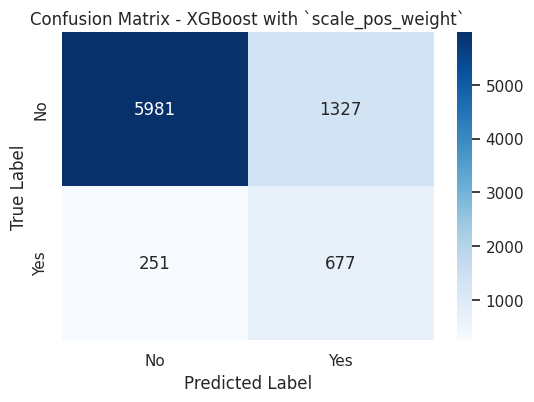

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

# Calculate `scale_pos_weight` (Handling Class Imbalance)
neg, pos = np.bincount(y_train)  # Count occurrences of each class
scale_pos_weight = neg / pos  # Ratio of negative to positive samples

# ✅ Initialize XGBoost Model with `scale_pos_weight`
xgb_model = XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=scale_pos_weight,  # Balancing classes
    learning_rate=0.1,  
    n_estimators=500,  
    max_depth=5,  
    subsample=0.8,  
    colsample_bytree=0.8,  
    random_state=42,  
    eval_metric="logloss"  
)

# Train the model
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)

# ✅ Evaluate the Model (Focusing on Recall)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)  # Key metric
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall ( Important): {recall:.2f}")  # Focus on reducing false negatives
print(f"F1 Score: {f1:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix (Key for Recall)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - XGBoost with `scale_pos_weight`")
plt.show()


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 500, 'scale_pos_weight': 7.876313662085691, 'subsample': 0.8}
Accuracy: 0.81
Precision: 0.34
Recall (🔍 Important): 0.75
F1 Score: 0.47

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.82      0.88      7308
         1.0       0.34      0.75      0.47       928

    accuracy                           0.81      8236
   macro avg       0.65      0.78      0.68      8236
weighted avg       0.89      0.81      0.84      8236



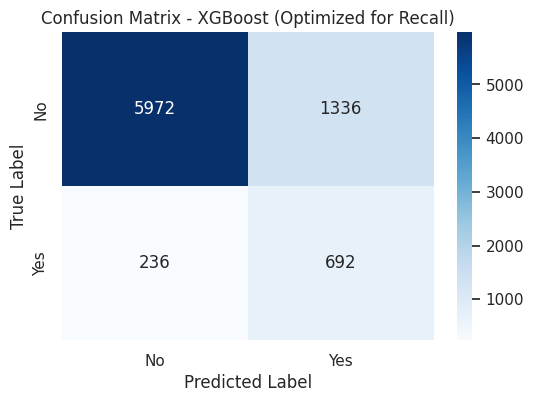

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

# ✅ Calculate `scale_pos_weight` for Handling Class Imbalance
neg, pos = np.bincount(y_train)  
scale_pos_weight = neg / pos  

# ✅ Define Parameter Grid
param_grid = {
    "learning_rate": [0.01, 0.05, 0.1],  
    "n_estimators": [100, 500, 1000],  
    "max_depth": [3, 5, 7],  
    "subsample": [0.8, 1.0],  
    "colsample_bytree": [0.8, 1.0],  
    "scale_pos_weight": [scale_pos_weight]  # Balancing classes
}

# ✅ Initialize XGBoost Model
xgb_model = XGBClassifier(
    objective='binary:logistic',
    random_state=42,
    eval_metric="logloss"
)

# ✅ GridSearchCV for Hyperparameter Tuning
grid_search = GridSearchCV(
    xgb_model, param_grid, 
    scoring="recall",  # Prioritizing Recall
    cv=3,  
    n_jobs=-1,  
    verbose=1  
)

# ✅ Train GridSearchCV
grid_search.fit(X_train, y_train)

# ✅ Best Model Selection
best_xgb_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# ✅ Predictions with Best Model
y_pred = best_xgb_model.predict(X_test)

# ✅ Evaluate Model (Focusing on Recall)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)  # Key metric
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall (🔍 Important): {recall:.2f}")  # Focus on reducing false negatives
print(f"F1 Score: {f1:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ✅ Confusion Matrix (Key for Recall)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - XGBoost (Optimized for Recall)")
plt.show()


In [91]:
best_xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [92]:
# Stacking Best Models (KNN - RF - XGboost- AdaBoost - GradientBoostingClassifier)

In [93]:
knn_grid.best_params_

{'model__leaf_size': 60, 'model__n_neighbors': 71}

In [94]:
adaboost_clf_grid.best_params_

{'model__n_estimators': 1200}

In [95]:
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import recall_score, make_scorer

# # Define the Gradient Boosting model
# gb = GradientBoostingClassifier(random_state=42)

# # Define parameter grid
# param_grid_gb = {
#     'n_estimators': [100, 300, 500],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 5, 7]
# }

# # GridSearchCV with recall optimization
# grid_gb = GridSearchCV(gb, param_grid_gb, scoring=make_scorer(recall_score), cv=5, n_jobs=-1, verbose=1)
# grid_gb.fit(X_train, y_train)

# # Best model and recall score
# print(f"Best Gradient Boosting Recall: {grid_gb.best_score_:.4f}")
# print(f"Best Parameters: {grid_gb.best_params_}")


In [96]:
# from sklearn.ensemble import RandomForestClassifier

# # Define the Random Forest model
# rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# # Define parameter grid
# param_grid_rf = {
#     'n_estimators': [100, 300, 500],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10]
# }

# # GridSearchCV with recall optimization
# grid_rf = GridSearchCV(rf, param_grid_rf, scoring=make_scorer(recall_score), cv=5, n_jobs=-1, verbose=1)
# grid_rf.fit(X_train, y_train)

# # Best model and recall score
# print(f"Best Random Forest Recall: {grid_rf.best_score_:.4f}")
# print(f"Best Parameters: {grid_rf.best_params_}")


In [97]:
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as Imb_Pipeline
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

# Define Voting Classifier with Best Models
voting_clf = VotingClassifier(estimators=[
    ('knn', KNeighborsClassifier(n_neighbors=71, leaf_size=60)),  # Tuned KNN
    ('xgboost', XGBClassifier(colsample_bytree=0.8, learning_rate=0.05, 
                              max_depth=3, n_estimators=500, scale_pos_weight=7.87, 
                              subsample=0.8, random_state=42)),  # XGBoost Fixed
    ('adaboost', AdaBoostClassifier(n_estimators=1200, learning_rate=1.0, random_state=42))  # AdaBoost
], voting='soft', n_jobs=-1)

# Define Voting Pipeline
voting_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing step
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),  # Handle class imbalance
    ("model", voting_clf)  # Voting Classifier with tuned models
])

# Print final pipeline
print(voting_pipeline)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('RobustScaler',
                                                                   RobustScaler())]),
                                                  Index(['duration', 'previous', 'poutcome', 'is_contacted_before'], dtype='object'))])),
                ('solve_imbalanced', RandomUnderSampler(random_state=42)),
                ('model',
                 VotingClassifier(estimators=[('knn',
                                               KNeighborsClassifier(leaf_size=60,
                                                                    n...
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                       

In [98]:
# VotingClassifier Performance on Validation Set

from sklearn.model_selection import KFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

voting_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing step
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),  # Handle class imbalance
    ("model", voting_clf)  # Voting Classifier with tuned models
])

voting_pipeline.fit(X_train, y_train)
y_train_pred = voting_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")
    
    voting_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing step
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),  # Handle class imbalance
    ("model", voting_clf)  # Voting Classifier with tuned models
    ])

    voting_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = voting_pipeline.predict(X_train.iloc[valid_indx])
    
    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))
    
    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Train Accuracy: 0.6129933211900425
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.5952337583485123
Average Valid F1 Score: 0.33620181575691577
Average Valid Precsion: 0.2062815599330003
Average Valid Recall: 0.9091948935799719


In [99]:
voting_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('RobustScaler',
                                                                   RobustScaler())]),
                                                  Index(['duration', 'previous', 'poutcome', 'is_contacted_before'], dtype='object'))])),
                ('solve_imbalanced', RandomUnderSampler(random_state=42)),
                ('model',
                 VotingClassifier(estimators=[('knn',
                                               KNeighborsClassifier(leaf_size=60,
                                                                    n...
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=3,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=500,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=42, ...)),
                                              ('adaboost',
                                               AdaBoostClassifier(n_estimators=1200,
                                                                  random_state=42))],
                                  n_jobs=-1, voting='soft'))])

In [100]:
from sklearn.ensemble import StackingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.pipeline import Pipeline as Imb_Pipeline
from imblearn.under_sampling import RandomUnderSampler

# Define Stacking Classifier with optimized models
stacking_clf = StackingClassifier(
    estimators=[
        ('knn', KNeighborsClassifier(n_neighbors=71, leaf_size=60)),  # Tuned KNN
        ('xgboost', XGBClassifier(colsample_bytree=0.8, learning_rate=0.05, 
                                  max_depth=3, n_estimators=500, scale_pos_weight=7.87, 
                                  subsample=0.8, random_state=42)),  # XGBoost
        ('adaboost', AdaBoostClassifier(n_estimators=1200, learning_rate=1.0, random_state=42))  # AdaBoost
    ],  # ✅ Fixed missing comma
    final_estimator=XGBClassifier(colsample_bytree=0.8, learning_rate=0.05, 
                                max_depth=3, n_estimators=800, scale_pos_weight=7.87, 
                                subsample=0.8, random_state=42),  # XGBoost as meta-learner
    cv=3,
    n_jobs=-1
)

# Define Stacking Pipeline
stacking_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing step
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),  # Handle class imbalance
    ('model', stacking_clf)  # Stacking Classifier with optimized models
])

# Print final pipeline
print(stacking_pipeline)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('RobustScaler',
                                                                   RobustScaler())]),
                                                  Index(['duration', 'previous', 'poutcome', 'is_contacted_before'], dtype='object'))])),
                ('solve_imbalanced', RandomUnderSampler(random_state=42)),
                ('model',
                 StackingClassifier(cv=3,
                                    estimators=[('knn',
                                                 KNeighborsClassifier(leaf_si...
                                                                  grow_policy=None,
                                                                  importance_type=None,
                                                                  interaction_constraints=None,
                                              

In [101]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import numpy as np

# Lists to store validation metrics
valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

# Define the optimized Stacking Pipeline
stacking_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),  # Consistent with previous pipeline
    ('model', stacking_clf)  # Optimized Stacking Classifier
])

# Fit the model on full training data before validation
stacking_pipeline.fit(X_train, y_train)
y_train_pred = stacking_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

# Cross-validation setup
skfolds = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

for i, (train_indx, valid_indx) in enumerate(skfolds.split(X_train, y_train), 1):
    print(f"At fold {i}")

    # Get train and validation splits
    X_train_fold, X_valid_fold = X_train.iloc[train_indx], X_train.iloc[valid_indx]
    y_train_fold, y_valid_fold = y_train.iloc[train_indx], y_train.iloc[valid_indx]

    # Fit on the current fold
    stacking_pipeline.fit(X_train_fold, y_train_fold)
    y_valid_pred = stacking_pipeline.predict(X_valid_fold)

    # Store validation metrics
    valid_accuracy_score.append(accuracy_score(y_valid_fold, y_valid_pred))
    valid_f1_score.append(f1_score(y_valid_fold, y_valid_pred))
    valid_precision_score.append(precision_score(y_valid_fold, y_valid_pred))
    valid_recall_score.append(recall_score(y_valid_fold, y_valid_pred))

# Print final averaged scores
print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score):.4f}")
print(f"Average Valid F1 Score: {np.mean(valid_f1_score):.4f}")
print(f"Average Valid Precision: {np.mean(valid_precision_score):.4f}")
print(f"Average Valid Recall: {np.mean(valid_recall_score):.4f}")


Train Accuracy: 0.36153612629022464
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.3757
Average Valid F1 Score: 0.2607
Average Valid Precision: 0.1505
Average Valid Recall: 0.9763


In [102]:
stacking_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('RobustScaler',
                                                                   RobustScaler())]),
                                                  Index(['duration', 'previous', 'poutcome', 'is_contacted_before'], dtype='object'))])),
                ('solve_imbalanced', RandomUnderSampler(random_state=42)),
                ('model',
                 StackingClassifier(cv=3,
                                    estimators=[('knn',
                                                 KNeighborsClassifier(leaf_si...
                                                                  grow_policy=None,
                                                                  importance_type=None,
                                                                  interaction_constraints=None,
                                                                  learning_rate=0.05,
                                                                  max_bin=None,
                                                                  max_cat_threshold=None,
                                                                  max_cat_to_onehot=None,
                                                                  max_delta_step=None,
                                                                  max_depth=3,
                                                                  max_leaves=None,
                                                                  min_child_weight=None,
                                                                  missing=nan,
                                                                  monotone_constraints=None,
                                                                  multi_strategy=None,
                                                                  n_estimators=800,
                                                                  n_jobs=None,
                                                                  num_parallel_tree=None,
                                                                  random_state=42, ...),
                                    n_jobs=-1))])

# 5) PR Curve on Validation Data
* to determine threshold

Getting Voting Scores
Getting Stacking Scores


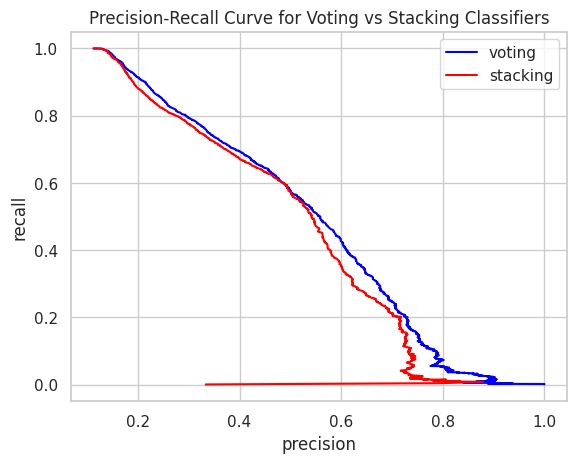

In [103]:
print("Getting Voting Scores")
y_valid_voting_prob = cross_val_predict(voting_pipeline, X_train, y_train, cv=3, method='predict_proba')
print("Getting Stacking Scores")
y_valid_stacking_prob = cross_val_predict(stacking_pipeline, X_train, y_train, cv=3, method='predict_proba')
precision_voting_scores, recall_voting_scores, voting_thresholds = precision_recall_curve(y_train, y_valid_voting_prob[:, 1])
precision_stacking_scores, recall_stacking_scores, stacking_thresholds = precision_recall_curve(y_train, y_valid_stacking_prob[:, 1])

# Fix: Make sure we use consistent array slicing for both x and y coordinates
plt.plot(precision_voting_scores[:-2], recall_voting_scores[:-2], label='voting', color='blue')
plt.plot(precision_stacking_scores[:-2], recall_stacking_scores[:-2], label='stacking', color='red')
plt.legend()
plt.xlabel('precision')
plt.ylabel('recall') # so we can pick threshold at precision = , Recall=
plt.title('Precision-Recall Curve for Voting vs Stacking Classifiers')
plt.grid(True)
plt.show()

In [104]:
y_valid_stacking_predict = cross_val_predict(stacking_pipeline, X_train, y_train, cv=3, method='predict')
confusion_matrix(y_train, y_valid_stacking_predict)

array([[ 8349, 20880],
       [   88,  3623]])

In [105]:
y_valid_voting_predict = cross_val_predict(voting_pipeline, X_train, y_train, cv=3, method='predict')
confusion_matrix(y_train, y_valid_voting_predict)

array([[16095, 13134],
       [  339,  3372]])

In [106]:
# from sklearn.ensemble import VotingClassifier, StackingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
# from xgboost import XGBClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import GridSearchCV
# from imblearn.pipeline import Pipeline as Imb_Pipeline
# from imblearn.under_sampling import RandomUnderSampler

# # Define base classifiers
# knn = KNeighborsClassifier()
# xgb = XGBClassifier(scale_pos_weight=7.87, random_state=42)
# adaboost = AdaBoostClassifier(random_state=42)

# # Voting Classifier Pipeline
# voting_clf = VotingClassifier(estimators=[
#     ('knn', knn),
#     ('xgboost', xgb),
#     ('adaboost', adaboost)
# ], voting='soft', n_jobs=-1)

# voting_pipeline = Imb_Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('solve_imbalanced', RandomUnderSampler(random_state=42)),
#     ('model', voting_clf)
# ])

# # Stacking Classifier Pipeline
# stacking_clf = StackingClassifier(
#     estimators=[('knn', knn), ('xgboost', xgb), ('adaboost', adaboost)],
#     final_estimator=gb, cv=3, n_jobs=-1
# )

# stacking_pipeline = Imb_Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('solve_imbalanced', RandomUnderSampler(random_state=42)),
#     ('model', stacking_clf)
# ])

# # Define hyperparameters for tuning
# param_grid_voting = {
#     'model__knn__n_neighbors': [50, 70, 100],
#     'model__adaboost__n_estimators': [800, 1200, 1500],
#     'model__xgboost__n_estimators': [300, 500, 800]
# }

# param_grid_stacking = {
#     'model__final_estimator__learning_rate': [0.05, 0.1, 0.2],
#     'model__final_estimator__n_estimators': [3000, 5000, 7000],
#     'model__xgboost__n_estimators': [300, 500, 800]
# }

# # GridSearch for Voting Classifier
# voting_grid = GridSearchCV(voting_pipeline, param_grid_voting, cv=3, n_jobs=-1, scoring='recall')
# voting_grid.fit(X_train, y_train)
# print(f'Best Voting Classifier Params: {voting_grid.best_params_}')

# # GridSearch for Stacking Classifier
# stacking_grid = GridSearchCV(stacking_pipeline, param_grid_stacking, cv=3, n_jobs=-1, scoring='recall')
# stacking_grid.fit(X_train, y_train)
# print(f'Best Stacking Classifier Params: {stacking_grid.best_params_}')


In [107]:
from sklearn.ensemble import StackingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.pipeline import Pipeline as Imb_Pipeline
from imblearn.under_sampling import RandomUnderSampler

# Define Stacking Classifier with optimized models
stacking_clf = StackingClassifier(
    estimators=[
        ('knn', KNeighborsClassifier(n_neighbors=100, leaf_size=60)),  # Tuned KNN
        ('xgboost', XGBClassifier(colsample_bytree=0.8, learning_rate=0.05, 
                                  max_depth=3, n_estimators=800, scale_pos_weight=7.87, 
                                  subsample=0.8, random_state=42)),  # XGBoost
        ('adaboost', AdaBoostClassifier(n_estimators=1500, learning_rate=1.0, random_state=42))  # AdaBoost
    ],
    final_estimator=XGBClassifier(colsample_bytree=0.8, learning_rate=0.05, 
                                max_depth=3, n_estimators=800, scale_pos_weight=7.87, 
                                subsample=0.8, random_state=42),  # XGBoost as meta-learner
    cv=3,
    n_jobs=-1
)

# Define Stacking Pipeline
stacking_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing step
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),  # Handle class imbalance
    ('model', stacking_clf)  # Stacking Classifier with optimized models
])

# Print final pipeline
print(stacking_pipeline)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('RobustScaler',
                                                                   RobustScaler())]),
                                                  Index(['duration', 'previous', 'poutcome', 'is_contacted_before'], dtype='object'))])),
                ('solve_imbalanced', RandomUnderSampler(random_state=42)),
                ('model',
                 StackingClassifier(cv=3,
                                    estimators=[('knn',
                                                 KNeighborsClassifier(leaf_si...
                                                                  grow_policy=None,
                                                                  importance_type=None,
                                                                  interaction_constraints=None,
                                              

In [108]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import numpy as np

# Lists to store validation metrics
valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

# Define the optimized Stacking Pipeline
stacking_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),  # Consistent with previous pipeline
    ('model', stacking_clf)  # Optimized Stacking Classifier
])

# Fit the model on full training data before validation
stacking_pipeline.fit(X_train, y_train)
y_train_pred = stacking_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

# Cross-validation setup
skfolds = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

for i, (train_indx, valid_indx) in enumerate(skfolds.split(X_train, y_train), 1):
    print(f"At fold {i}")

    # Get train and validation splits
    X_train_fold, X_valid_fold = X_train.iloc[train_indx], X_train.iloc[valid_indx]
    y_train_fold, y_valid_fold = y_train.iloc[train_indx], y_train.iloc[valid_indx]

    # Fit on the current fold
    stacking_pipeline.fit(X_train_fold, y_train_fold)
    y_valid_pred = stacking_pipeline.predict(X_valid_fold)

    # Store validation metrics
    valid_accuracy_score.append(accuracy_score(y_valid_fold, y_valid_pred))
    valid_f1_score.append(f1_score(y_valid_fold, y_valid_pred))
    valid_precision_score.append(precision_score(y_valid_fold, y_valid_pred))
    valid_recall_score.append(recall_score(y_valid_fold, y_valid_pred))

# Print final averaged scores
print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score):.4f}")
print(f"Average Valid F1 Score: {np.mean(valid_f1_score):.4f}")
print(f"Average Valid Precision: {np.mean(valid_precision_score):.4f}")
print(f"Average Valid Recall: {np.mean(valid_recall_score):.4f}")


Train Accuracy: 0.3753491196114147
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.3820
Average Valid F1 Score: 0.2626
Average Valid Precision: 0.1518
Average Valid Recall: 0.9760


In [109]:
stacking_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('RobustScaler',
                                                                   RobustScaler())]),
                                                  Index(['duration', 'previous', 'poutcome', 'is_contacted_before'], dtype='object'))])),
                ('solve_imbalanced', RandomUnderSampler(random_state=42)),
                ('model',
                 StackingClassifier(cv=3,
                                    estimators=[('knn',
                                                 KNeighborsClassifier(leaf_si...
                                                                  grow_policy=None,
                                                                  importance_type=None,
                                                                  interaction_constraints=None,
                                                                  learning_rate=0.05,
                                                                  max_bin=None,
                                                                  max_cat_threshold=None,
                                                                  max_cat_to_onehot=None,
                                                                  max_delta_step=None,
                                                                  max_depth=3,
                                                                  max_leaves=None,
                                                                  min_child_weight=None,
                                                                  missing=nan,
                                                                  monotone_constraints=None,
                                                                  multi_strategy=None,
                                                                  n_estimators=800,
                                                                  n_jobs=None,
                                                                  num_parallel_tree=None,
                                                                  random_state=42, ...),
                                    n_jobs=-1))])

In [110]:
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as Imb_Pipeline
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

# Define Voting Classifier with Best Models
voting_clf = VotingClassifier(estimators=[
    ('knn', KNeighborsClassifier(n_neighbors=100, leaf_size=60)),  # Tuned KNN
    ('xgboost', XGBClassifier(colsample_bytree=0.8, learning_rate=0.05, 
                              max_depth=3, n_estimators=530, scale_pos_weight=7.87, 
                              subsample=0.8, random_state=42)),  # XGBoost Fixed
    ('adaboost', AdaBoostClassifier(n_estimators=1500, learning_rate=1.0, random_state=42))  # AdaBoost
], voting='soft', n_jobs=-1)

# Define Voting Pipeline
voting_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing step
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),  # Handle class imbalance
    ("model", voting_clf)  # Voting Classifier with tuned models
])

# Print final pipeline
print(voting_pipeline)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('RobustScaler',
                                                                   RobustScaler())]),
                                                  Index(['duration', 'previous', 'poutcome', 'is_contacted_before'], dtype='object'))])),
                ('solve_imbalanced', RandomUnderSampler(random_state=42)),
                ('model',
                 VotingClassifier(estimators=[('knn',
                                               KNeighborsClassifier(leaf_size=60,
                                                                    n...
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                       

In [111]:
# VotingClassifier Performance on Validation Set

from sklearn.model_selection import KFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

voting_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing step
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),  # Handle class imbalance
    ("model", voting_clf)  # Voting Classifier with tuned models
])

voting_pipeline.fit(X_train, y_train)
y_train_pred = voting_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")
    
    voting_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing step
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),  # Handle class imbalance
    ("model", voting_clf)  # Voting Classifier with tuned models
    ])

    voting_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = voting_pipeline.predict(X_train.iloc[valid_indx])
    
    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))
    
    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Train Accuracy: 0.6072556162720097
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.596508803885853
Average Valid F1 Score: 0.33715000693622554
Average Valid Precsion: 0.20690487030488028
Average Valid Recall: 0.9105411513750983


In [112]:
voting_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('RobustScaler',
                                                                   RobustScaler())]),
                                                  Index(['duration', 'previous', 'poutcome', 'is_contacted_before'], dtype='object'))])),
                ('solve_imbalanced', RandomUnderSampler(random_state=42)),
                ('model',
                 VotingClassifier(estimators=[('knn',
                                               KNeighborsClassifier(leaf_size=60,
                                                                    n...
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=3,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=530,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=42, ...)),
                                              ('adaboost',
                                               AdaBoostClassifier(n_estimators=1500,
                                                                  random_state=42))],
                                  n_jobs=-1, voting='soft'))])

Getting Voting Scores
Getting Stacking Scores


Text(0, 0.5, 'precision')

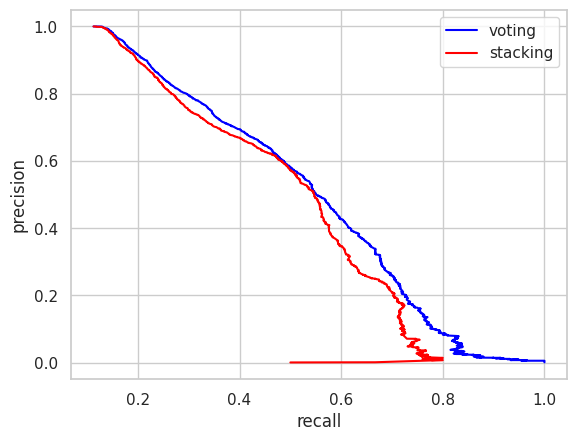

In [113]:
print("Getting Voting Scores")
y_valid_voting_prob = cross_val_predict(voting_pipeline, X_train, y_train, cv=3, method='predict_proba')
print("Getting Stacking Scores")
y_valid_stacking_prob = cross_val_predict(stacking_pipeline, X_train, y_train, cv=3, method='predict_proba')
precision_voting_scores, recall_voting_scores, voting_thresholds = precision_recall_curve(y_train, y_valid_voting_prob[:, 1])
precision_stacking_scores, recall_stacking_scores, stacking_thresholds = precision_recall_curve(y_train, y_valid_stacking_prob[:, 1])

plt.plot(precision_voting_scores[:-2], recall_voting_scores[:-2], label='voting', color='blue')
plt.plot(precision_stacking_scores[:-2], recall_stacking_scores[:-2], label='stacking', color='red')
plt.legend()
plt.xlabel('recall')
plt.ylabel('precision') # so we can pick threshold at precision = , Recall=

In [114]:
y_valid_stacking_predict = cross_val_predict(stacking_pipeline, X_train, y_train, cv=3, method='predict')
confusion_matrix(y_train, y_valid_stacking_predict)

array([[ 8735, 20494],
       [   91,  3620]])

In [115]:
y_valid_voting_predict = cross_val_predict(voting_pipeline, X_train, y_train, cv=3, method='predict')
confusion_matrix(y_train, y_valid_voting_predict)

array([[15995, 13234],
       [  326,  3385]])

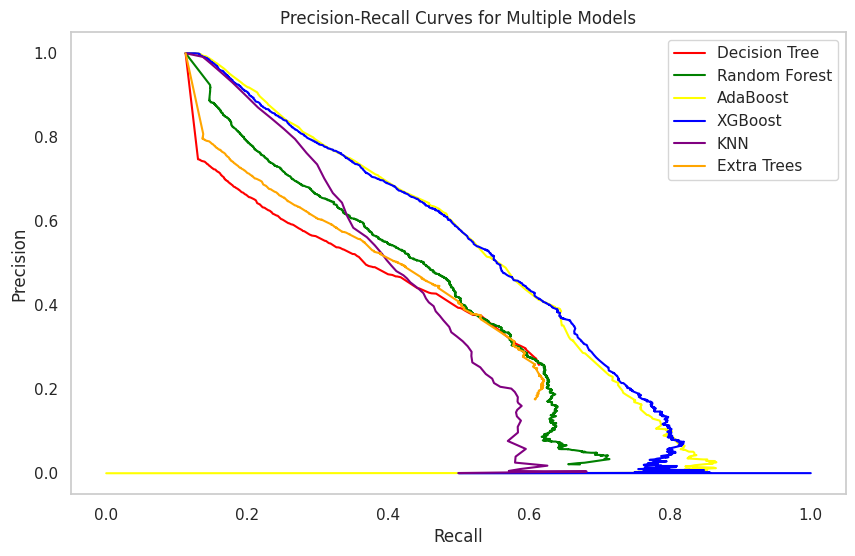

In [116]:
# First define the best models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Define best models with their optimized parameters
best_dt_clf_model = DecisionTreeClassifier(random_state=42)
best_rf_clf_model = RandomForestClassifier(n_estimators=500, random_state=42)
best_adaboost_clf_model = AdaBoostClassifier(n_estimators=1500, learning_rate=1.0, random_state=42)
best_xgb_model = XGBClassifier(colsample_bytree=0.8, learning_rate=0.05, 
                              max_depth=3, n_estimators=800, scale_pos_weight=7.87, 
                              subsample=0.8, random_state=42)
best_knn_model = KNeighborsClassifier(n_neighbors=100, leaf_size=60)
best_et_model = ExtraTreesClassifier(n_estimators=500, random_state=42)

# Get probabilities using cross validation
y_valid_dt_prob = cross_val_predict(best_dt_clf_model, X_train, y_train, cv=3, method='predict_proba')
y_valid_rf_prob = cross_val_predict(best_rf_clf_model, X_train, y_train, cv=3, method='predict_proba')
y_valid_ada_prob = cross_val_predict(best_adaboost_clf_model, X_train, y_train, cv=3, method='predict_proba')
y_valid_xgb_prob = cross_val_predict(best_xgb_model, X_train, y_train, cv=3, method='predict_proba')
y_valid_knn_prob = cross_val_predict(best_knn_model, X_train, y_train, cv=3, method='predict_proba')
y_valid_et_prob = cross_val_predict(best_et_model, X_train, y_train, cv=3, method='predict_proba')

# Compute precision-recall curves
precision_xgb_scores, recall_xgb_scores, xgb_thresholds = precision_recall_curve(y_train, y_valid_xgb_prob[:, 1])
precision_knn_scores, recall_knn_scores, knn_thresholds = precision_recall_curve(y_train, y_valid_knn_prob[:, 1])
precision_et_scores, recall_et_scores, et_thresholds = precision_recall_curve(y_train, y_valid_et_prob[:, 1])
precision_dt_scores, recall_dt_scores, dt_thresholds = precision_recall_curve(y_train, y_valid_dt_prob[:, 1])
precision_rf_scores, recall_rf_scores, rf_thresholds = precision_recall_curve(y_train, y_valid_rf_prob[:, 1])
precision_ada_scores, recall_ada_scores, ada_thresholds = precision_recall_curve(y_train, y_valid_ada_prob[:, 1])

# Plot precision-recall curves
plt.figure(figsize=(10, 6))
plt.plot(precision_dt_scores[:-1], recall_dt_scores[:-1], label='Decision Tree', color='red')
plt.plot(precision_rf_scores[:-1], recall_rf_scores[:-1], label='Random Forest', color='green')
plt.plot(precision_ada_scores[:-1], recall_ada_scores[:-1], label='AdaBoost', color='yellow')
plt.plot(precision_xgb_scores[:-1], recall_xgb_scores[:-1], label='XGBoost', color='blue')
plt.plot(precision_knn_scores[:-1], recall_knn_scores[:-1], label='KNN', color='purple')
plt.plot(precision_et_scores[:-1], recall_et_scores[:-1], label='Extra Trees', color='orange')

plt.legend()
plt.grid()
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Multiple Models')
plt.show()

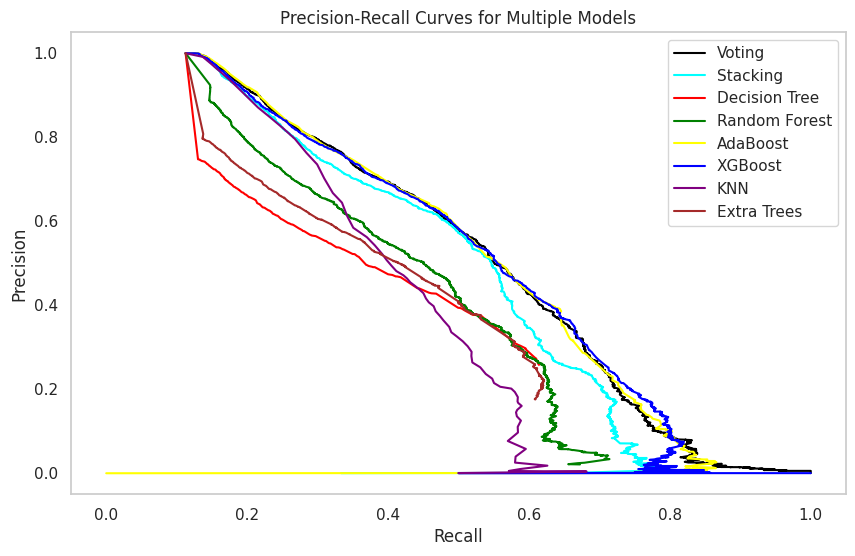

In [117]:
plt.figure(figsize=(10, 6))

# Voting and Stacking Models
plt.plot(precision_voting_scores[:-1], recall_voting_scores[:-1], label='Voting', color='black')
plt.plot(precision_stacking_scores[:-1], recall_stacking_scores[:-1], label='Stacking', color='cyan')  # Changed to cyan

# Base Models
plt.plot(precision_dt_scores[:-1], recall_dt_scores[:-1], label='Decision Tree', color='red')
plt.plot(precision_rf_scores[:-1], recall_rf_scores[:-1], label='Random Forest', color='green')
plt.plot(precision_ada_scores[:-1], recall_ada_scores[:-1], label='AdaBoost', color='yellow')
plt.plot(precision_xgb_scores[:-1], recall_xgb_scores[:-1], label='XGBoost', color='blue')
plt.plot(precision_knn_scores[:-1], recall_knn_scores[:-1], label='KNN', color='purple')
plt.plot(precision_et_scores[:-1], recall_et_scores[:-1], label='Extra Trees', color='brown')  # Changed to brown

plt.legend()
plt.grid()
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Multiple Models')
plt.show()

Text(0, 0.5, 'tpr')

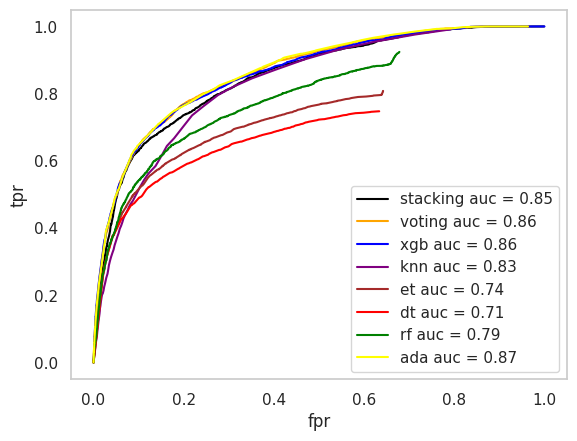

In [118]:
fpr_voting_scores, tpr_voting_scores, voting_roc_thresholds = roc_curve(y_train, y_valid_voting_prob[:, 1])
fpr_stacking_scores, tpr_stacking_scores, stacking_roc_thresholds = roc_curve(y_train, y_valid_stacking_prob[:, 1])

fpr_xgb_scores, tpr_xgb_scores, xgb_roc_thresholds = roc_curve(y_train, y_valid_xgb_prob[:, 1])
fpr_knn_scores, tpr_knn_scores, knn_roc_thresholds = roc_curve(y_train, y_valid_knn_prob[:, 1])
fpr_et_scores, tpr_et_scores, et_roc_thresholds = roc_curve(y_train, y_valid_et_prob[:, 1])

fpr_dt_scores, tpr_dt_scores, dt_roc_thresholds = roc_curve(y_train, y_valid_dt_prob[:, 1])
fpr_rf_scores, tpr_rf_scores, rf_roc_thresholds = roc_curve(y_train, y_valid_rf_prob[:, 1])
fpr_ada_scores, tpr_ada_scores, ada_roc_thresholds = roc_curve(y_train, y_valid_ada_prob[:, 1])

plt.plot(fpr_stacking_scores[:-1], tpr_stacking_scores[:-1], label=f'stacking auc = {roc_auc_score(y_train, y_valid_stacking_prob[:, 1]):.2f}', color='black')
plt.plot(fpr_voting_scores[:-1], tpr_voting_scores[:-1], label=f'voting auc = {roc_auc_score(y_train, y_valid_voting_prob[:, 1]):.2f}', color='orange')

plt.plot(fpr_xgb_scores[:-1], tpr_xgb_scores[:-1], label=f'xgb auc = {roc_auc_score(y_train, y_valid_xgb_prob[:, 1]):.2f}', color='blue')
plt.plot(fpr_knn_scores[:-1], tpr_knn_scores[:-1], label=f'knn auc = {roc_auc_score(y_train, y_valid_knn_prob[:, 1]):.2f}', color='purple')
plt.plot(fpr_et_scores[:-1], tpr_et_scores[:-1], label=f'et auc = {roc_auc_score(y_train, y_valid_et_prob[:, 1]):.2f}', color='brown')

plt.plot(fpr_dt_scores[:-1], tpr_dt_scores[:-1], label=f'dt auc = {roc_auc_score(y_train, y_valid_dt_prob[:, 1]):.2f}', color='red')
plt.plot(fpr_rf_scores[:-1], tpr_rf_scores[:-1], label=f'rf auc = {roc_auc_score(y_train, y_valid_rf_prob[:, 1]):.2f}', color='green')
plt.plot(fpr_ada_scores[:-1], tpr_ada_scores[:-1], label=f'ada auc = {roc_auc_score(y_train, y_valid_ada_prob[:, 1]):.2f}', color='yellow')
plt.legend()
plt.grid()
plt.xlabel('fpr')
plt.ylabel('tpr')

In [119]:
indx = np.argmax(recall_stacking_scores <= 0.70)
t_70_recall = stacking_thresholds[indx]
y_stacking_prob = cross_val_predict(stacking_pipeline, X_train, y_train, cv=3, method='predict_proba')
y_stacking_threshold_pred = (y_stacking_prob[:, 1] >= t_70_recall)
print(f"Accuracy: {accuracy_score(y_train, y_stacking_threshold_pred)}") # accuracy
print(f"F1 Score: {f1_score(y_train, y_stacking_threshold_pred)}") # F1
print(f"Precsion: {precision_score(y_train, y_stacking_threshold_pred)}") # Precsion
print(f"Recall: {recall_score(y_train, y_stacking_threshold_pred)}") # Recall

Accuracy: 0.823952641165756
F1 Score: 0.47209831588529816
Precsion: 0.35647511685455047
Recall: 0.6987334950148208


In [120]:
indx = np.argmax(recall_voting_scores <= 0.70)
t_70_recall = voting_thresholds[indx]
y_voting_prob = cross_val_predict(voting_pipeline, X_train, y_train, cv=3, method='predict_proba')
y_voting_threshold_pred = (y_voting_prob[:, 1] >= t_70_recall)
print(f"Accuracy: {accuracy_score(y_train, y_voting_threshold_pred)}") # accuracy
print(f"F1 Score: {f1_score(y_train, y_voting_threshold_pred)}") # F1
print(f"Precsion: {precision_score(y_train, y_voting_threshold_pred)}") # Precsion
print(f"Recall: {recall_score(y_train, y_voting_threshold_pred)}") # Recall

Accuracy: 0.8435336976320583
F1 Score: 0.5017401392111369
Precsion: 0.3912256897331524
Recall: 0.6992724333063864


In [121]:
# from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# from sklearn.model_selection import cross_val_predict
# from imblearn.pipeline import Pipeline as Imb_Pipeline
# from xgboost import XGBClassifier

# # Define XGBoost pipeline with best parameters
# xgb_pipeline = Imb_Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('solve_imbalanced', RandomUnderSampler(random_state=42)),
#     ('model', XGBClassifier(colsample_bytree=0.8, learning_rate=0.05, 
#                            max_depth=3, n_estimators=800, scale_pos_weight=7.87, 
#                            subsample=0.8, random_state=42))
# ])


# desired_recall = 0.80 


# indx = np.argmax(recall_xgb_scores >= desired_recall)  
# t_80_recall = xgb_thresholds[indx]  # Extract the corresponding threshold

# # Apply the threshold to make predictions
# y_xgb_prob = cross_val_predict(xgb_pipeline, X_train, y_train, cv=3, method='predict_proba')
# y_xgb_threshold_pred = (y_xgb_prob[:, 1] >= t_80_recall)

# # Evaluate the model at this threshold
# print(f"Threshold for {desired_recall*100:.0f}% recall: {t_80_recall}")
# print(f"Accuracy: {accuracy_score(y_train, y_xgb_threshold_pred)}") 
# print(f"F1 Score: {f1_score(y_train, y_xgb_threshold_pred)}") 
# print(f"Precision: {precision_score(y_train, y_xgb_threshold_pred)}") 
# print(f"Recall: {recall_score(y_train, y_xgb_threshold_pred)}")

In [122]:
# confusion_matrix(y_train, y_xgb_threshold_pred) 

In [123]:
confusion_matrix(y_train, y_voting_threshold_pred) 

array([[25191,  4038],
       [ 1116,  2595]])

In [124]:
confusion_matrix(y_train, y_stacking_threshold_pred) 

array([[24548,  4681],
       [ 1118,  2593]])

In [125]:
y_stacking_test_pred = stacking_pipeline.predict(X_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_stacking_test_pred)}") # Test accuracy
print(f"Test F1 Score: {f1_score(y_test, y_stacking_test_pred)}") # Test F1
print(f"Test Precsion: {precision_score(y_test, y_stacking_test_pred)}") # Test Precsion
print(f"Test Recall: {recall_score(y_test, y_stacking_test_pred)}") # Test Recall

Test Accuracy: 0.3770033997085964
Test F1 Score: 0.26225736879942485
Test Precsion: 0.15131906421105026
Test Recall: 0.9827586206896551


In [126]:
confusion_matrix(y_test, y_stacking_test_pred)

array([[2193, 5115],
       [  16,  912]])

In [127]:
y_voting_test_pred = voting_pipeline.predict(X_test)

print(f"Test Accuracy: {accuracy_score(y_test, y_voting_test_pred)}") 
print(f"Test F1 Score: {f1_score(y_test, y_voting_test_pred)}") 
print(f"Test Precision: {precision_score(y_test, y_voting_test_pred)}") 
print(f"Test Recall: {recall_score(y_test, y_voting_test_pred)}")  

Test Accuracy: 0.605148130160272
Test F1 Score: 0.3427647534357316
Test Precision: 0.2109452736318408
Test Recall: 0.9137931034482759


In [128]:
confusion_matrix(y_test, y_voting_test_pred)

array([[4136, 3172],
       [  80,  848]])

In [129]:
y_stacking_test_scores = stacking_pipeline.predict_proba(X_test)
y_stacking_test_threshold_pred = (y_stacking_test_scores[:, 1] >= t_70_recall)
print(f"Test Accuracy: {accuracy_score(y_test, y_stacking_test_threshold_pred)}") # Test accuracy
print(f"Test F1 Score: {f1_score(y_test, y_stacking_test_threshold_pred)}") # Test F1
print(f"Test Precsion: {precision_score(y_test, y_stacking_test_threshold_pred)}") # Test Precsion
print(f"Test Recall: {recall_score(y_test, y_stacking_test_threshold_pred)}") # Test Recall

Test Accuracy: 0.5176056338028169
Test F1 Score: 0.3067527482114814
Test Precsion: 0.1830106183635228
Test Recall: 0.947198275862069


In [130]:
confusion_matrix(y_test, y_stacking_test_threshold_pred)

array([[3384, 3924],
       [  49,  879]])

In [131]:
joblib.dump(stacking_pipeline, 'stacking_pipeline.pkl')

['stacking_pipeline.pkl']

In [132]:
import joblib

from sklearn.base import TransformerMixin, BaseEstimator
import numpy as np

class LogTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.n_features_in = X.shape[1]
        return self

    def transform(self, X, y=None):
        assert self.n_features_in == X.shape[1]
        return np.log(X)


model = joblib.load("stacking_pipeline.pkl")
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('RobustScaler',
                                                                   RobustScaler())]),
                                                  Index(['duration', 'previous', 'poutcome', 'is_contacted_before'], dtype='object'))])),
                ('solve_imbalanced', RandomUnderSampler(random_state=42)),
                ('model',
                 StackingClassifier(cv=3,
                                    estimators=[('knn',
                                                 KNeighborsClassifier(leaf_si...
                                                                  grow_policy=None,
                                                                  importance_type=None,
                                                                  interaction_constraints=None,
                                                                  learning_rate=0.05,
                                                                  max_bin=None,
                                                                  max_cat_threshold=None,
                                                                  max_cat_to_onehot=None,
                                                                  max_delta_step=None,
                                                                  max_depth=3,
                                                                  max_leaves=None,
                                                                  min_child_weight=None,
                                                                  missing=nan,
                                                                  monotone_constraints=None,
                                                                  multi_strategy=None,
                                                                  n_estimators=800,
                                                                  n_jobs=None,
                                                                  num_parallel_tree=None,
                                                                  random_state=42, ...),
                                    n_jobs=-1))])